In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
courses = pd.read_csv('courses.csv', index_col = 'Unnamed: 0')
contents = pd.read_csv('course_contents.csv')
progresses = pd.read_csv('progresses.csv')
phases = pd.read_csv('progress_phases.csv')
contents = pd.read_csv('course_contents.csv')
students = pd.read_csv('students.csv')

courses_main = courses.merge(contents, left_on = 'id', right_on = 'course_id').drop('id', axis = 1)
progresses_main = progresses.merge(phases, left_on = 'id', right_on = 'progress_id')

main = pd.merge_ordered(progresses_main, courses_main, left_by = 'module_number').drop('id', axis = 1)\
       .rename(columns = {'title':'course_title', 'field':'course_field'})
main = main.reindex(columns = ['progress_id', 'module_number', 'lesson_number', 'status', 'start_date','finish_date',\
                               'student_id','course_id', 'course_title', 'course_field', 'module_title', 'lesson_title',\
                               'lesson_token', 'is_video', 'is_homework'])

main['start_date'] = pd.to_datetime(main['start_date'], errors = 'coerce')
main['finish_date'] = pd.to_datetime(main['finish_date'], errors = 'coerce')

main_st = main.merge(students, left_on = 'student_id', right_on = 'id').drop(['id_','id'], axis = 1)

In [3]:
print('Общее количество курсов: ', len(main['course_id'].unique()))

modules_count = main.groupby('course_title').agg({'module_number':'unique'})
modules_count['modules_count'] = modules_count['module_number'].apply(len)
modules_count = modules_count.drop('module_number', axis = 1)
modules_count.sort_values('modules_count')

Общее количество курсов:  15


modules_count
course_title                                      
PHP-разработчик с 0 до PRO. Часть 1              8
Веб-вёрстка для начинающих 2.0                   8
Excel Базовый                                    9
Java-разработчик c нуля                          9
SMM-маркетолог от А до Я                        11
Java-разработчик                                17
Веб-дизайн PRO 2.0                              17
Веб-дизайн Базовый                              17
Руководитель digital-проектов                   17
JavaScript с нуля                               18
Интернет-маркетолог от Ingate                   18
Веб-дизайн с нуля 2.0                           19
UX-дизайн                                       20
Веб-разработчик                                 20
Анимация интерфейсов                            21

In [4]:
lessons_count = main.groupby(['course_title', 'module_number']).agg({'lesson_number':'unique'}).reset_index()
lessons_count['lessons_count'] = lessons_count['lesson_number'].apply(len)
lessons_count = lessons_count.drop('lesson_number', axis = 1)
count_les = lessons_count.groupby('course_title').agg({'lessons_count':'sum'})

print('Наименьшее количество уроков на курсе ', list(count_les.idxmin()))
print('Наибольшее количество уроков на курсе ', list(count_les.idxmax()))

Наименьшее количество уроков на курсе  ['Веб-разработчик']
Наибольшее количество уроков на курсе  ['Интернет-маркетолог от Ingate']


In [5]:
# Медианное количество уроков по курсам

med_count_lessons = lessons_count.groupby('course_title').agg({'lessons_count':'median'}).reset_index()

print(f"Наибольшее медианное количество уроков на курсе {med_count_lessons['course_title']\
      [med_count_lessons['lessons_count']== med_count_lessons['lessons_count'].max()].iloc[0]}")
print(f"Наименьшее медианное количество уроков на курсе {med_count_lessons['course_title']\
      [med_count_lessons['lessons_count']== med_count_lessons['lessons_count'].min()].iloc[0]}")

Наибольшее медианное количество уроков на курсе Java-разработчик c нуля
Наименьшее медианное количество уроков на курсе Веб-разработчик


In [7]:
# Количество студентов по курсам
students_count = main.groupby(['course_title', 'course_field']).agg({'student_id':'unique'}).reset_index()
students_count['students_count'] = students_count['student_id'].apply(len)
students_count = students_count.drop('student_id', axis = 1).sort_values('students_count')
students_count

course_title course_field  students_count
5              SMM-маркетолог от А до Я    Marketing             506
10                   Веб-дизайн Базовый       Design             518
2               Java-разработчик c нуля  Development             581
7                  Анимация интерфейсов       Design             598
12                      Веб-разработчик  Development             628
14        Руководитель digital-проектов     Business             685
1                      Java-разработчик  Development             763
0                         Excel Базовый     Business             782
4   PHP-разработчик с 0 до PRO. Часть 1  Development             854
3                     JavaScript с нуля  Development             966
6                             UX-дизайн       Design            1151
9                    Веб-дизайн PRO 2.0       Design            1712
8        Веб-вёрстка для начинающих 2.0  Development            2004
11                Веб-дизайн с нуля 2.0       Design            2014
13        Интернет-маркетолог от Ingate    Marketing            2168

In [8]:
now = datetime.now()
main_st['birthday'] = pd.to_datetime(main_st['birthday'], errors = 'coerce')
main_st['age'] = (now - main_st['birthday']).astype('<m8[Y]')
main_st = main_st[(main_st['age'] > 10) & (main_st['age'] < 100)]
print('Минимальный возраст: ', main_st['age'].min())
print('Максимальный возраст: ', main_st['age'].max())
print('Средний возраст: ', main_st['age'].mean())
print('Медианный возраст: ', main_st['age'].median())
ages_st_course = main_st.groupby(['course_title']).agg({'age':['min', 'max', 'mean', 'median']})
ages_st_course.sort_values(('age', 'min'))

Минимальный возраст:  15.0
Максимальный возраст:  92.0
Средний возраст:  31.45919825500071
Медианный возраст:  31.0


age                        
                                      min   max       mean median
course_title                                                     
JavaScript с нуля                    15.0  61.0  30.313454   30.0
PHP-разработчик с 0 до PRO. Часть 1  15.0  76.0  32.769863   31.0
Веб-вёрстка для начинающих 2.0       15.0  61.0  30.411968   29.0
Веб-дизайн с нуля 2.0                15.0  77.0  29.836898   29.0
Веб-разработчик                      15.0  52.0  29.205483   29.0
Java-разработчик                     16.0  66.0  31.403768   30.0
Java-разработчик c нуля              16.0  56.0  31.685113   31.0
Веб-дизайн PRO 2.0                   16.0  61.0  30.178195   29.0
UX-дизайн                            17.0  87.0  32.108384   31.0
Анимация интерфейсов                 17.0  53.0  31.537179   31.0
Веб-дизайн Базовый                   17.0  53.0  30.258973   29.0
Excel Базовый                        18.0  62.0  34.880667   35.0
Интернет-маркетолог от Ingate        18.0  92.0  33.111756   32.0
SMM-маркетолог от А до Я             19.0  53.0  30.582142   30.0
Руководитель digital-проектов        20.0  56.0  33.567854   33.0

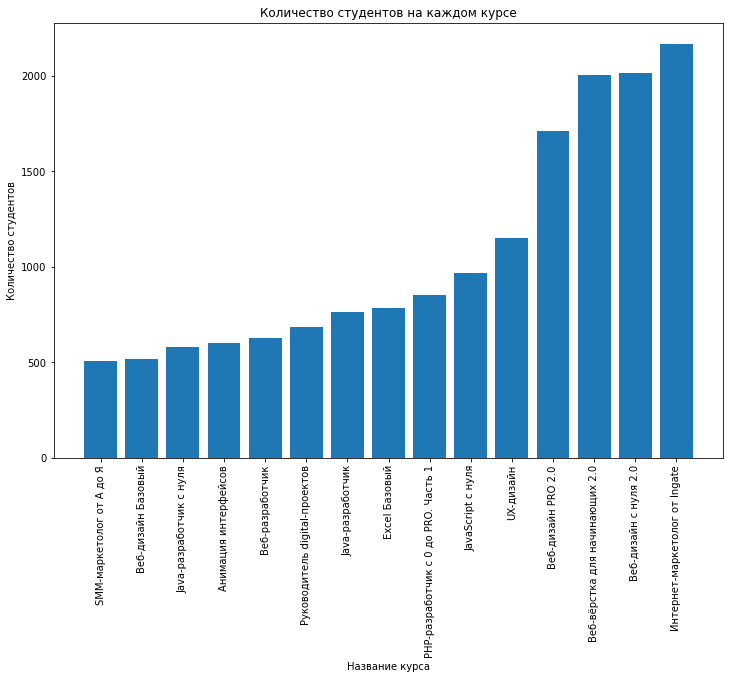

In [9]:
fig, ax = plt.subplots(figsize = (12,8))
plt.bar(students_count['course_title'], students_count['students_count'])
plt.title('Количество студентов на каждом курсе')
plt.xlabel('Название курса')
plt.ylabel('Количество студентов')
plt.xticks(rotation = 90);

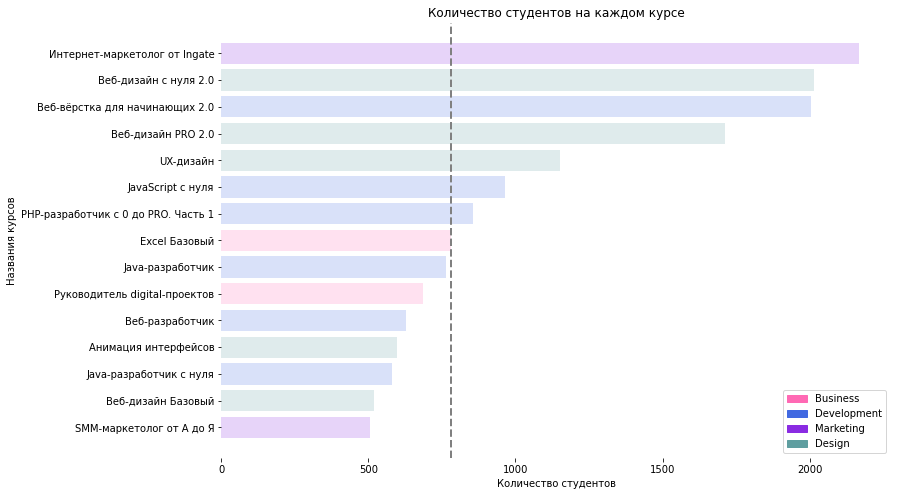

In [14]:
fig, ax = plt.subplots(figsize = (12,8))

students_count['color'] = students_count['course_field']
students_count['color'] = 'cadetblue'
students_count.loc[students_count['course_field'] == 'Business', 'color'] = 'hotpink'
students_count.loc[students_count['course_field'] == 'Development', 'color'] = 'royalblue'
students_count.loc[students_count['course_field'] == 'Marketing', 'color'] = 'blueviolet'

ax.barh(students_count['course_title'], students_count['students_count'].sort_values(), alpha = 0.2,\
        color = students_count['color'])
ax.axvline(x=students_count['students_count'].median(), color='grey', linewidth=2, linestyle='--')

ax.set_title('Количество студентов на каждом курсе')
ax.set_xlabel('Количество студентов')
ax.set_ylabel('Названия курсов')

pink_patch = mpatches.Patch(color='hotpink', label='Business')
blue_patch = mpatches.Patch(color='royalblue', label='Development')
violet_patch = mpatches.Patch(color='blueviolet', label='Marketing')
green_patch = mpatches.Patch(color='cadetblue', label='Design')
ax.legend(handles = [pink_patch, blue_patch, violet_patch, green_patch])
plt.box(on = None);

В представленном проекте всего 15 курсов, курс с наибольшим количеством модулей - Анимация интерфейсов, с самам меньшим количеством модулей PHP-разработчик с 0 до PRO. Часть 1 и Веб-вёрстка для начинающих 2.0 Наименьшее количество уроков содержит курс Веб-разработчик, наибольшее количество уроков на курсе Интернет-маркетолог от Ingate. Медианное количество уроков на курсах колеблется в диапазоне от 2 до 13.

Самый популярный курс Веб-дизайн с нуля 2.0 , т.к. он имеет наибольшее количество студентов. Самый непопулярный курс Веб-дизайн Базовый - на нем обучается наименьшее количество студентов.

Минимальный возраст студентов составляет 14 лет. Максимальный возраст - 91 год. Средний возраст студентов составляет 31 год. в то время как медианный возраст - 30 лет.

Самые молодые студенты предпочитают курсы по разработке, самые взрослые студенты предпочитают курсы по маркетингу и дизайну. Средний возраст студентов на всех курсах находится в диапазоне от 28 до 34 лет.

Исходя из графиков можно сказать что на лидирующих позициях по количеству студентов находятся преимущественно курсы по дизайну, такие как Веб-дизайн с нуля 2.0(занимает первое место по количеству обучающихся), Веб-дизайн PRO 2.0 (4 место) и UX-дизайн (5 место). Так же на лидирующих позициях находятся курсы по маркетингу (Интернет-маркетинг от Ingate на 2м месте) и разработке (Веб-вёрстка для начинающих 2.0 на 3м месте). Количество студентов на вышеперечисленных курсах находится в диапазоне от 1000 до 2100 студентов, что значительно превышает медианное значение количества студентов, обучающихся на всех курсах. Количество студентов на большей части курсов не превышает медианного количества и находится в диапазоне от 500 до 750 человек.

In [15]:
# Рассчет прироста студентов на каждом курсе в каждом месяце за всю историю.

raw_df = main[main['is_homework'] == True].groupby(['progress_id', 'course_title','module_title', 'module_number', \
                                    'lesson_title', 'lesson_number','start_date']).agg({'is_homework':'sum'}).reset_index()
raw_df['months'] = [raw_df['start_date'].iloc[i].date() for i in range(len(raw_df))]
raw_df['months'] = raw_df['months'] + pd.offsets.MonthEnd(0)

data_hw = raw_df.sort_values(['module_number', 'lesson_number']).groupby(['course_title']).\
                 agg({'module_number':'first','lesson_number':'first'}).reset_index()

data_st = raw_df.sort_values(['module_number', 'lesson_number']).groupby(['course_title', 'months', 'progress_id']).\
                 agg({'module_number':'first', 'lesson_number':'first'}).reset_index()

students_growth = data_st.merge(data_hw, how = 'inner', on = ['course_title','module_number', 'lesson_number']).\
                  groupby(['course_title', 'months']).agg(count_students = ('progress_id','count')).reset_index().\
                  sort_values('months')
students_growth['months'] = [students_growth['months'].iloc[i].date() for i in range(len(students_growth))]

maximum = raw_df['months'].max()
minimum = raw_df['months'].min()
all_period = (maximum.year - minimum.year +1)*12 - (12 - maximum.month) - (minimum.month-1)
dates = pd.DataFrame({'course_title':list(raw_df['course_title'].unique())})
dates.insert(0, 'start', minimum)
dates.insert(0, 'finish', maximum)
dates.insert(0, 'all_period', all_period)
dates['months']= dates.apply(lambda x: pd.date_range(minimum,
                             periods = x['all_period'], freq = 'M'), axis=1)
dates = dates.explode('months')
dates = dates.drop(['start','finish','all_period'], axis = 1)
dates['months'] = [dates['months'].iloc[i].date() for i in range(len(dates))]

students_growth = students_growth.merge(dates, how = 'right', on = ['months', 'course_title'])
students_growth = students_growth.fillna(0)
students_growth

course_title      months  count_students
0           JavaScript с нуля  2016-03-31             0.0
1           JavaScript с нуля  2016-04-30             0.0
2           JavaScript с нуля  2016-05-31             0.0
3           JavaScript с нуля  2016-06-30             0.0
4           JavaScript с нуля  2016-07-31             0.0
..                        ...         ...             ...
610  SMM-маркетолог от А до Я  2019-03-31            42.0
611  SMM-маркетолог от А до Я  2019-04-30            55.0
612  SMM-маркетолог от А до Я  2019-05-31            56.0
613  SMM-маркетолог от А до Я  2019-06-30            67.0
614  SMM-маркетолог от А до Я  2019-07-31            46.0

[615 rows x 3 columns]

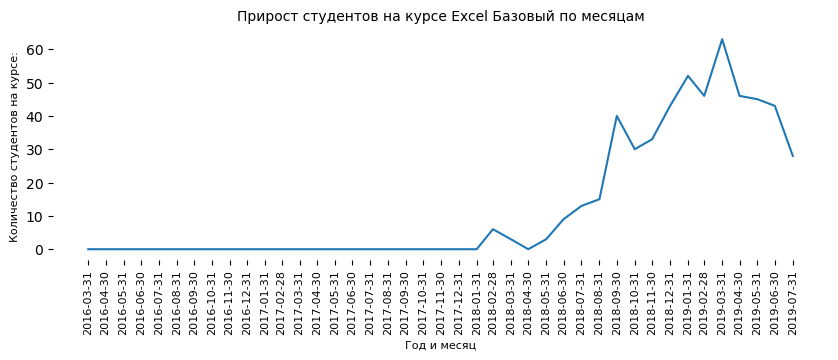

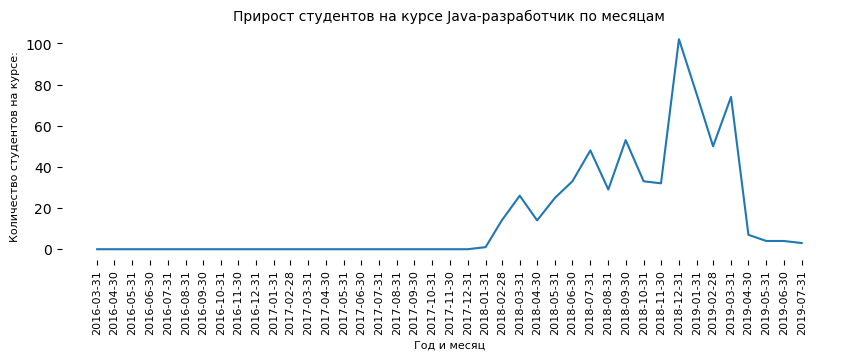

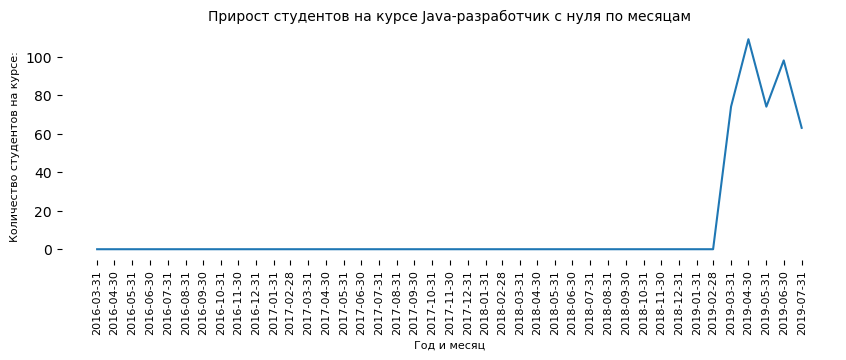

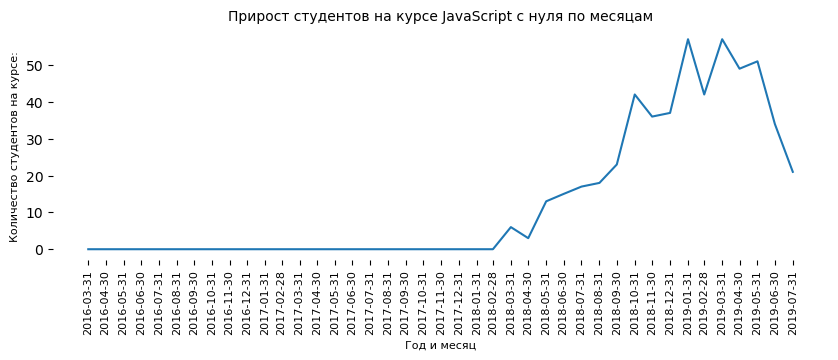

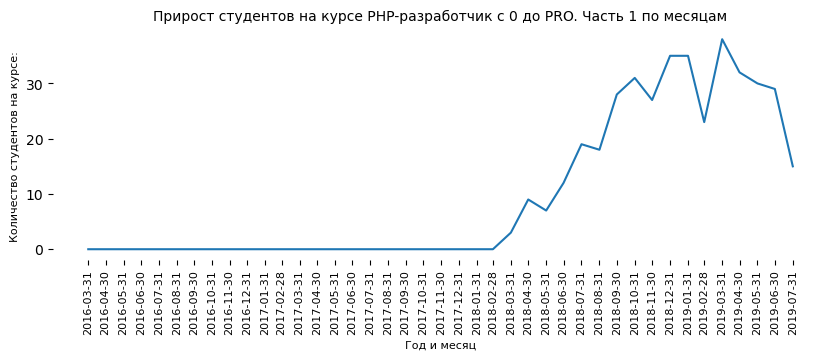

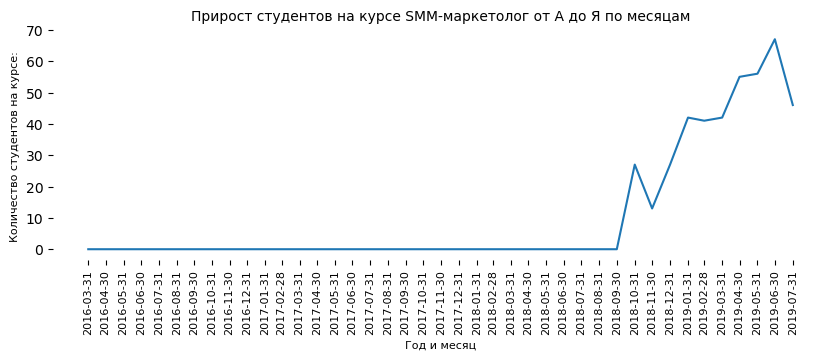

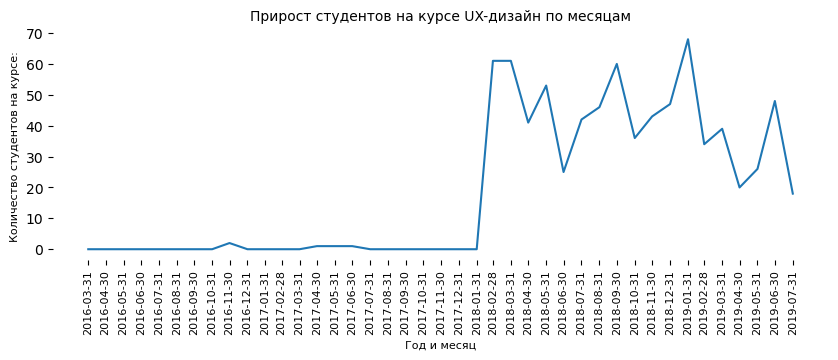

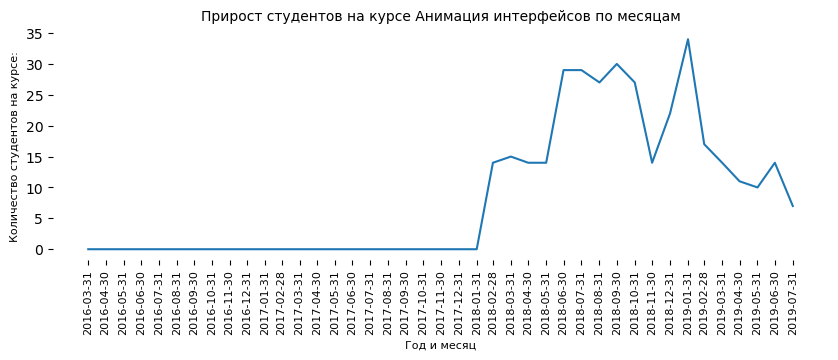

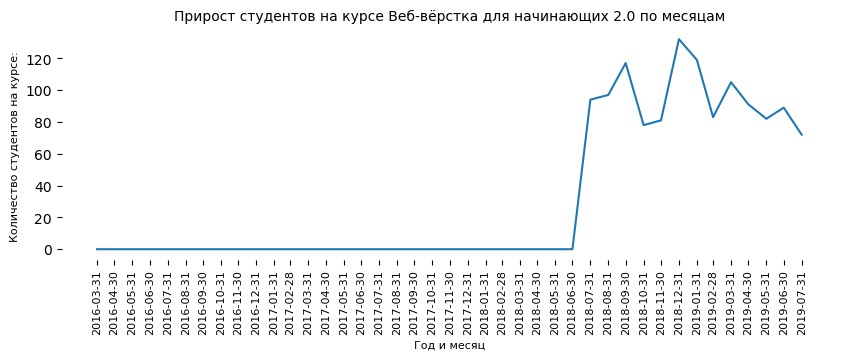

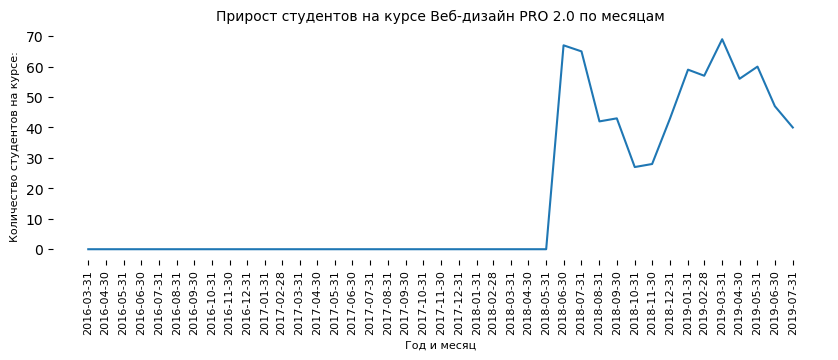

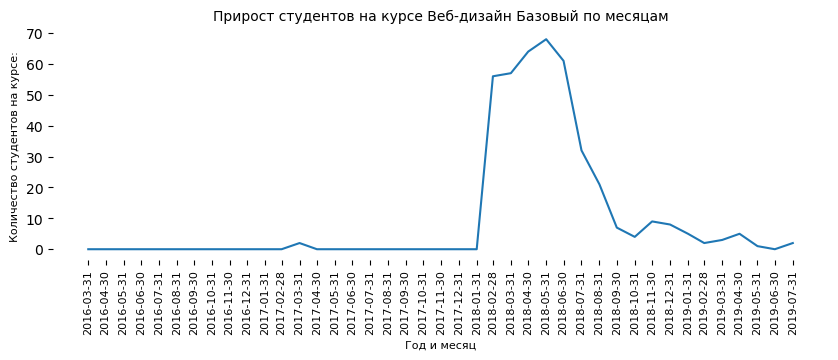

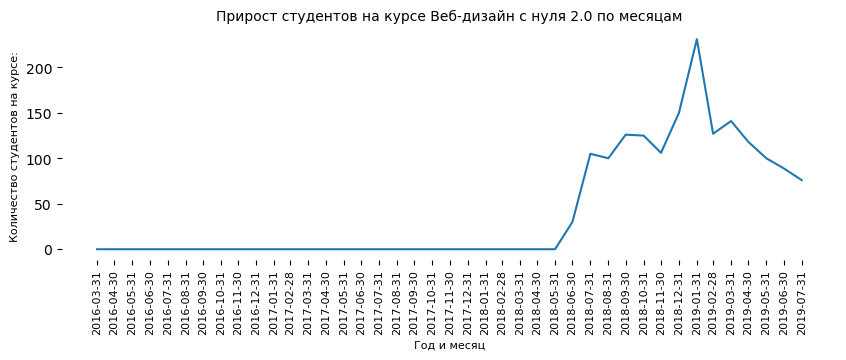

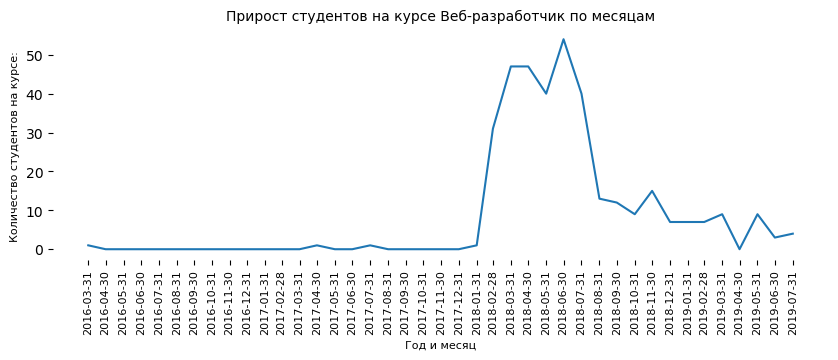

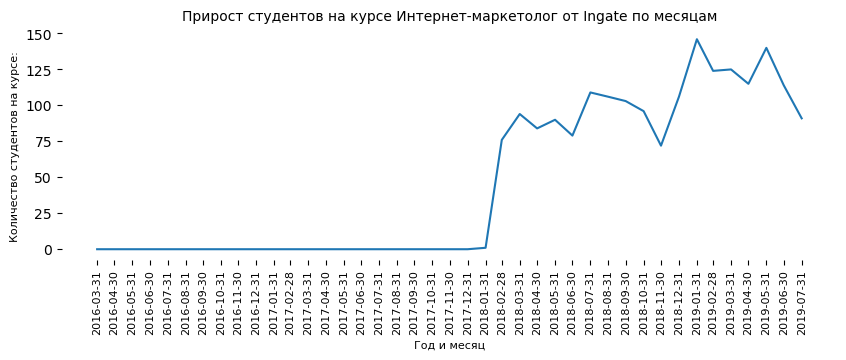

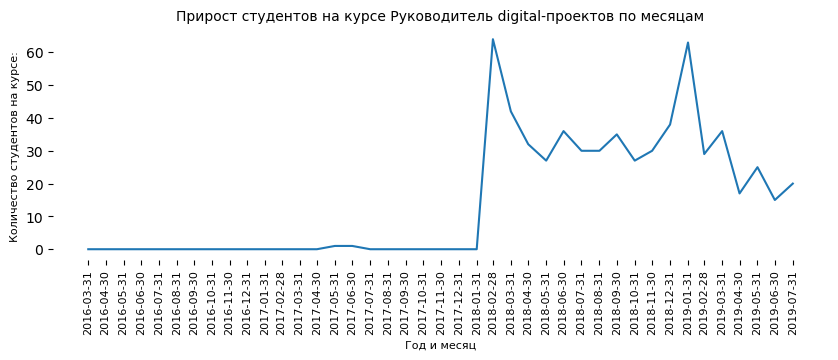

In [16]:
list_courses = list(students_growth['course_title'].sort_values().unique())
plt.rcdefaults() 

for i in range(len(list_courses)):
    fig,ax = plt.subplots(figsize = (10,3))
    data = students_growth[students_growth['course_title'] == list_courses[i]][['months', 'count_students']]
    ax.plot(data['months'], data['count_students'])
    ax.set_ylabel('Количество студентов на курсе: ',size = 8)
    ax.set_xlabel('Год и месяц', size = 8)
    ax.set_xticks(data['months'])
    ax.tick_params(axis = 'x', which = 'major', labelsize = 8, labelrotation = 90)
    ax.set_title('Прирост студентов на курсе ' + list_courses[i] + ' по месяцам', size =10)
    plt.box(on = None)
   

plt.show();

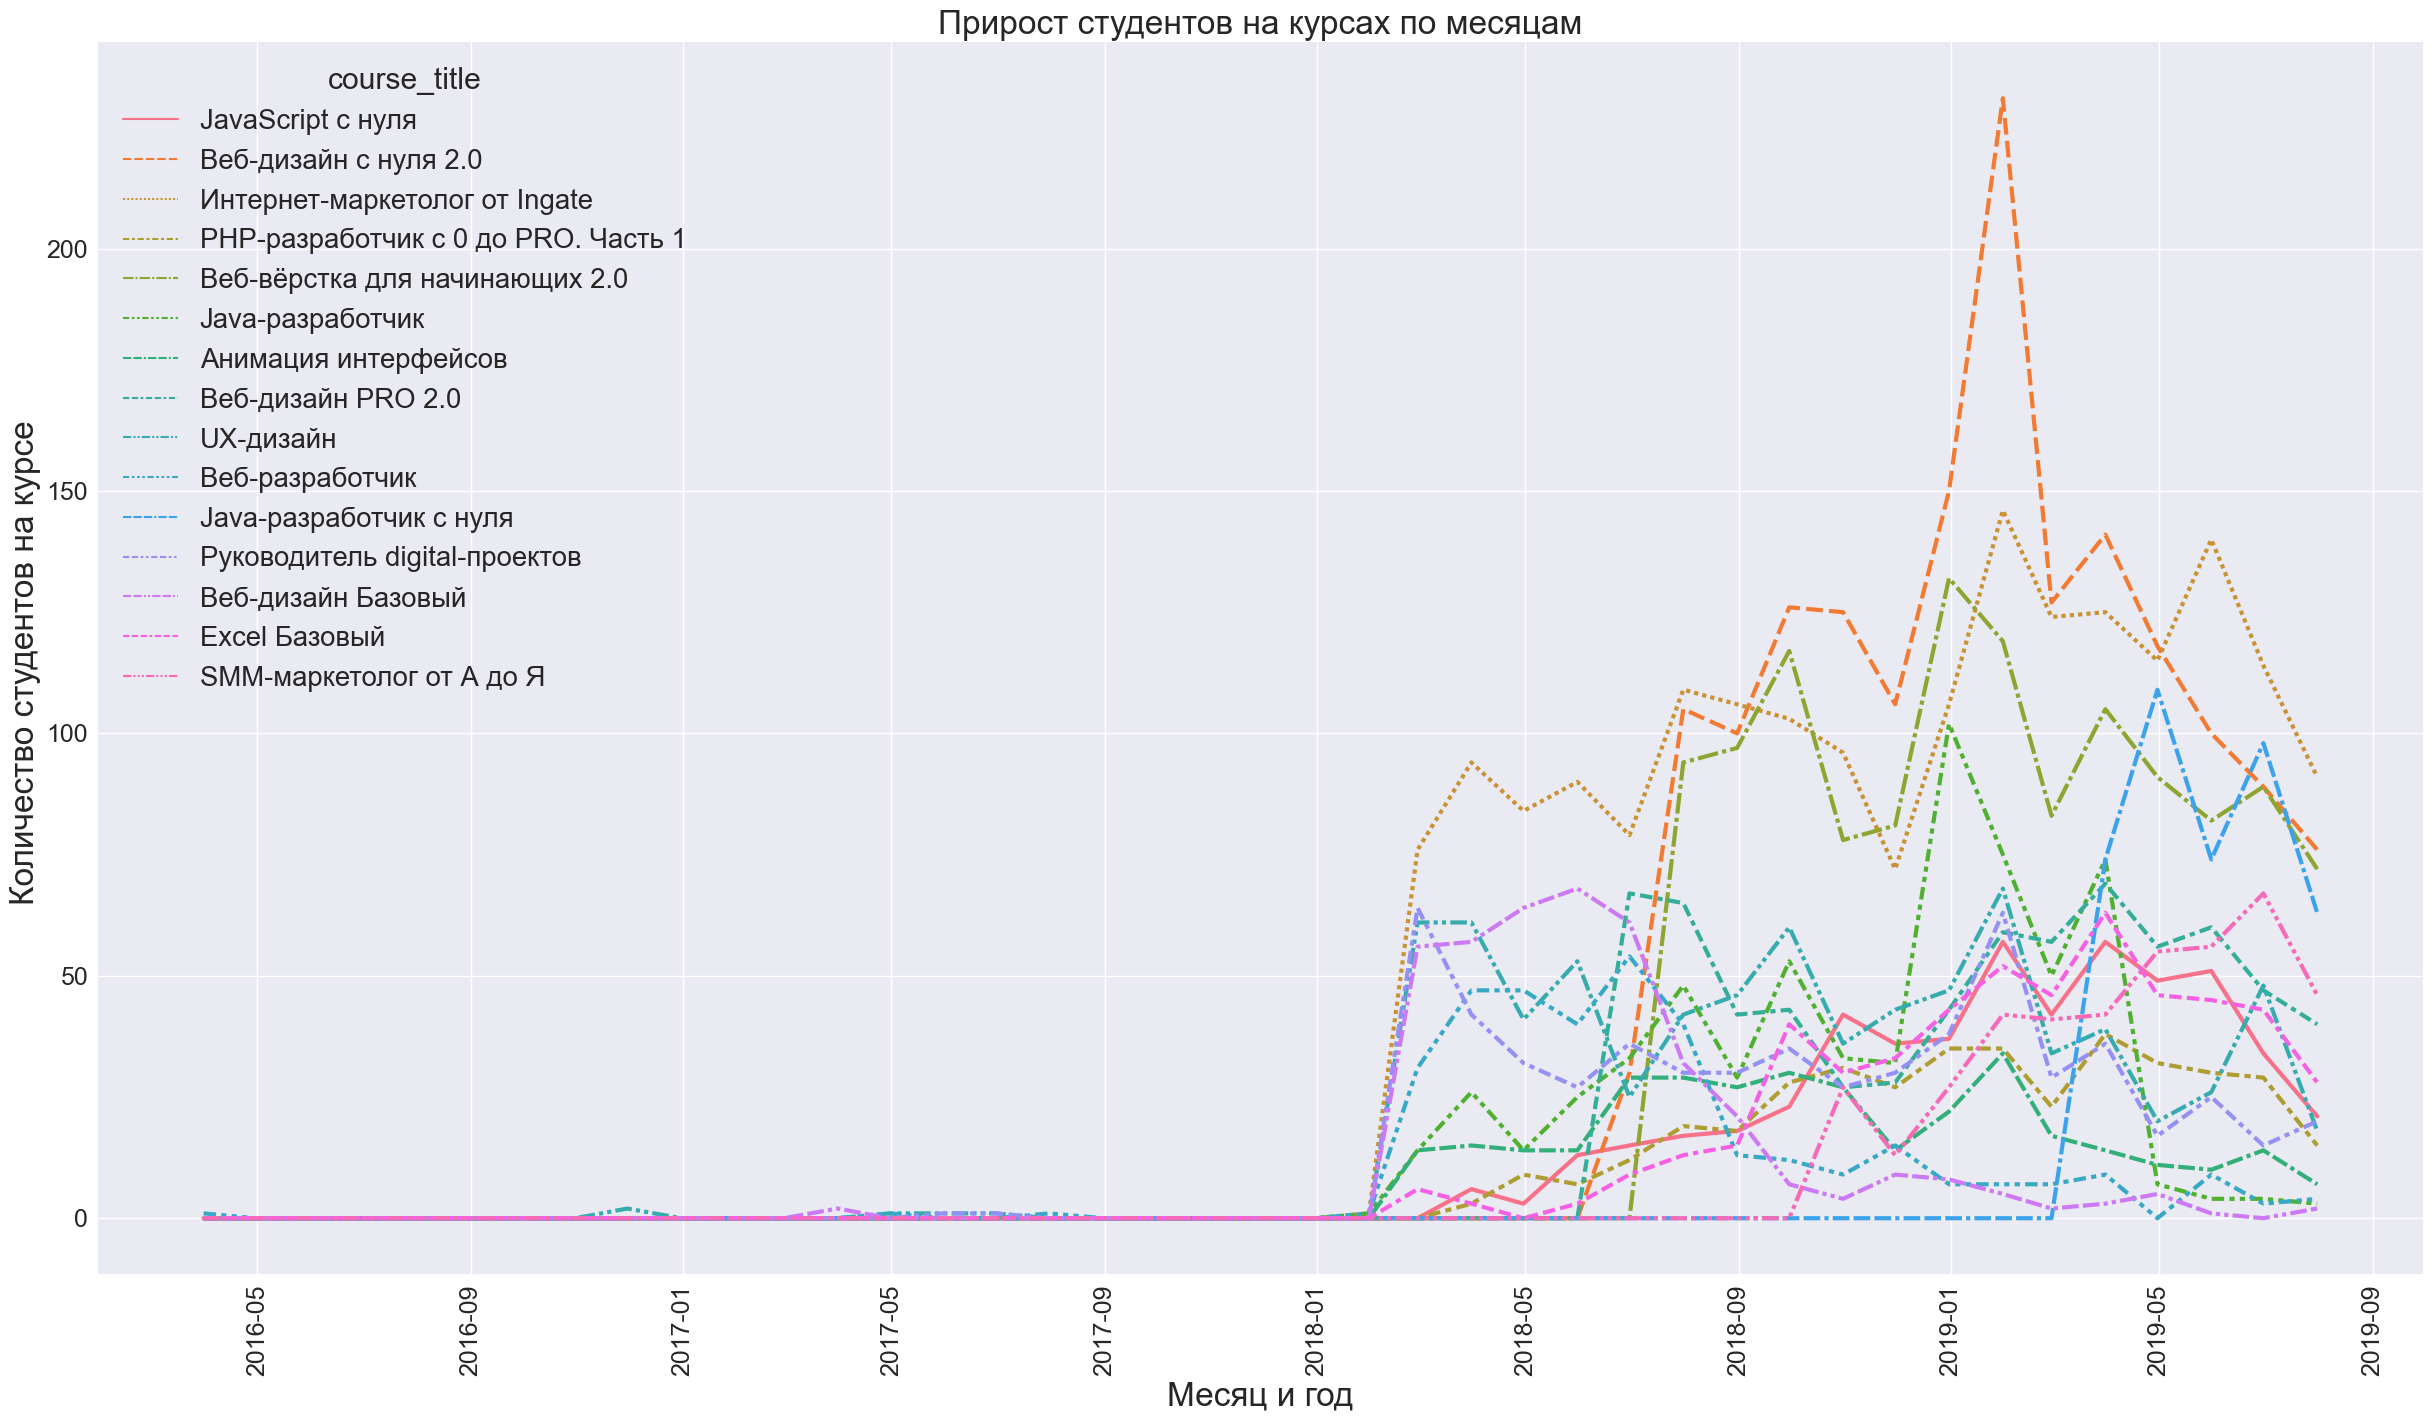

In [24]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize = (30,16))
sns.set(font_scale=1.8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
    
sns.lineplot(data = students_growth, x = 'months', y = 'count_students', hue = 'course_title',\
             style = 'course_title', linewidth = 3)
ax.set_ylabel('Количество студентов на курсе ', size = 24)
ax.set_xlabel('Месяц и год', size = 24)
plt.xticks(rotation = 90)
plt.title('Прирост студентов на курсах по месяцам', size = 24)
plt.show();

In [22]:
prog = main[main['is_homework']==True][['course_title', 'module_number', 'lesson_number', 'student_id','progress_id', 'status',\
                                        'start_date','finish_date']].sort_values(['start_date', 'finish_date'])

prog['start'] = prog['start_date'].values.astype('datetime64[M]')
prog['finish'] = prog['finish_date'].where(prog['finish_date'].isnull() == False, prog['start_date'])
prog['finish'] = prog['finish'] + pd.offsets.MonthEnd(0)
prog['periods'] = [(prog['finish'].iloc[i].year - prog['start'].iloc[i].year)*12 +\
               prog['finish'].iloc[i].month - prog['start'].iloc[i].month + 1 for i in range(len(prog))]
prog['months']= prog.apply(lambda x: pd.date_range(x["start"],
                                             periods = x['periods'], freq = 'M'), axis=1)
prog = prog.explode('months')
prog['months'] = [prog['months'].iloc[i].date() for i in range(len(prog))]

grouped_date = prog.groupby(['months', 'course_title']).agg({'progress_id':'count'}).reset_index()
grouped_date = grouped_date.merge(dates, how = 'right', on  =  ['months', 'course_title'])
grouped_date = grouped_date.fillna(0)

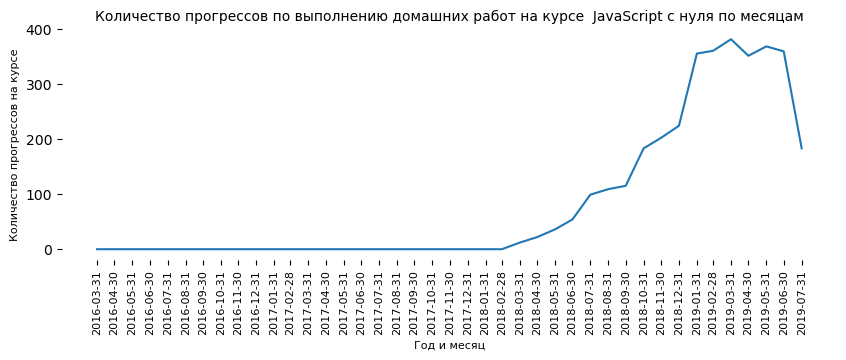

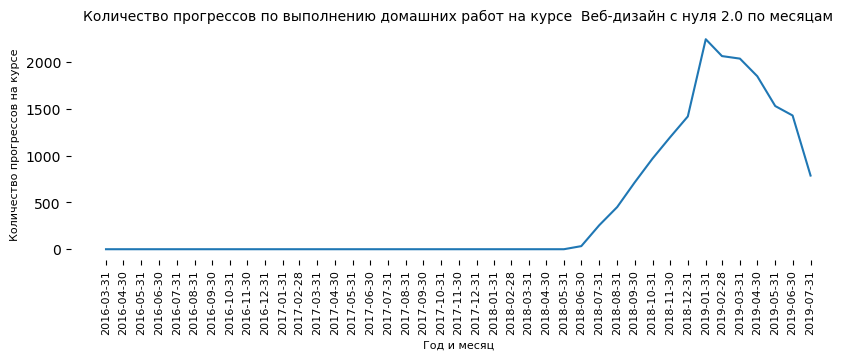

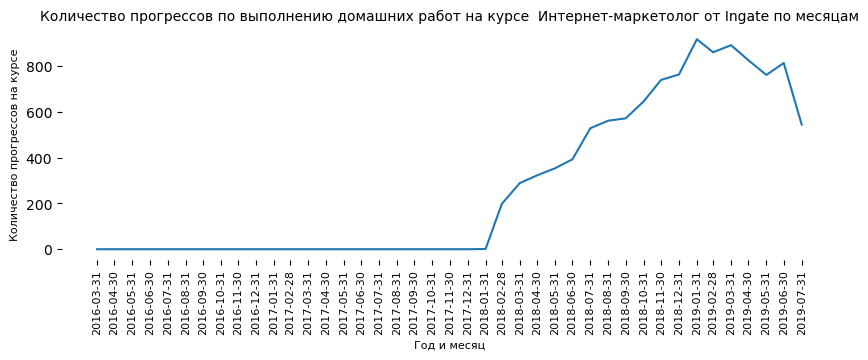

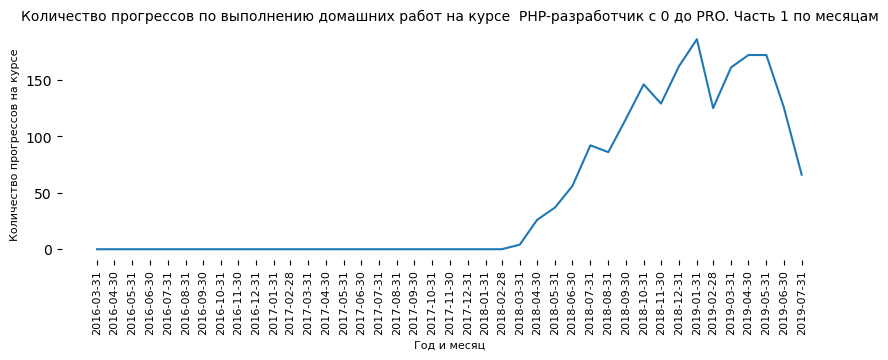

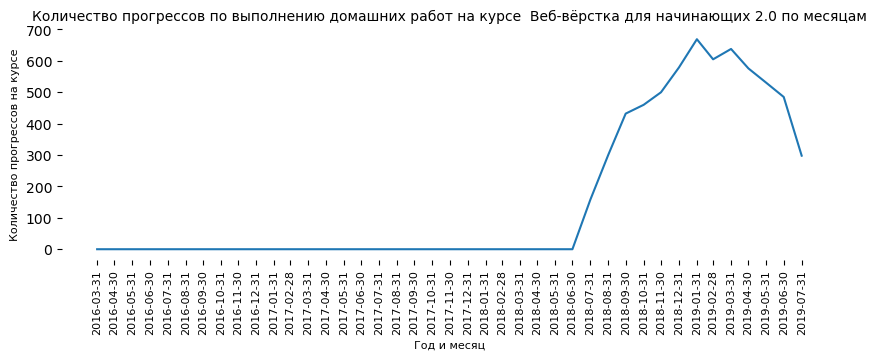

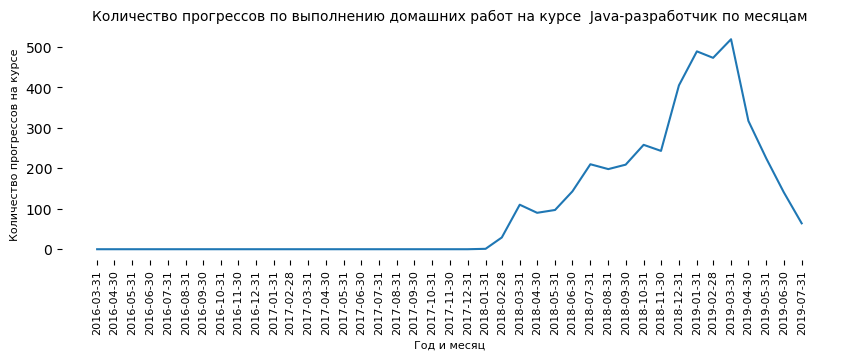

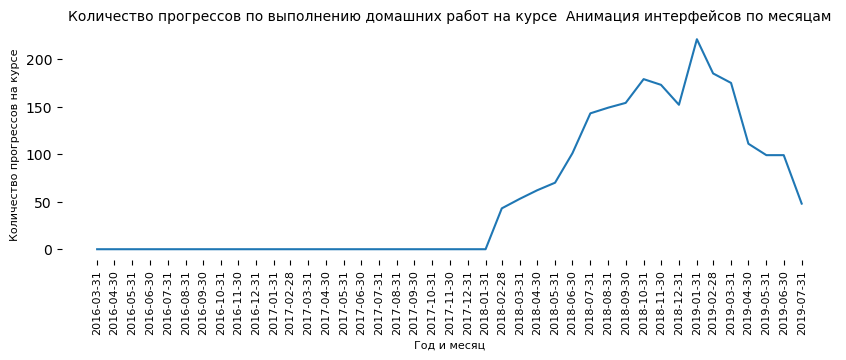

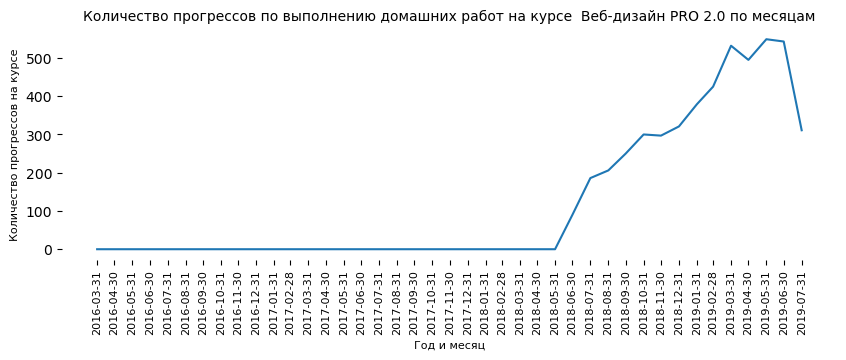

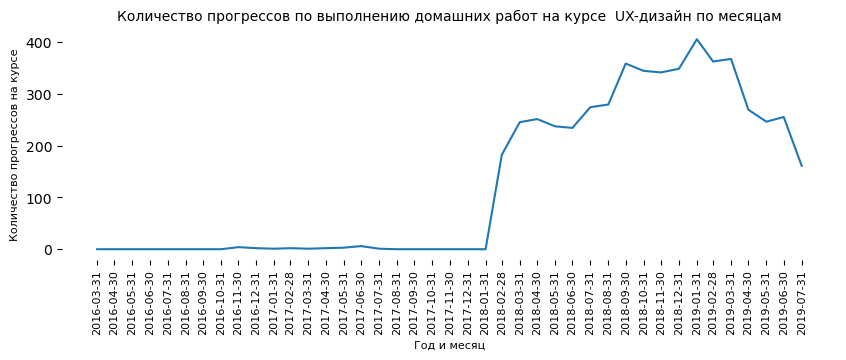

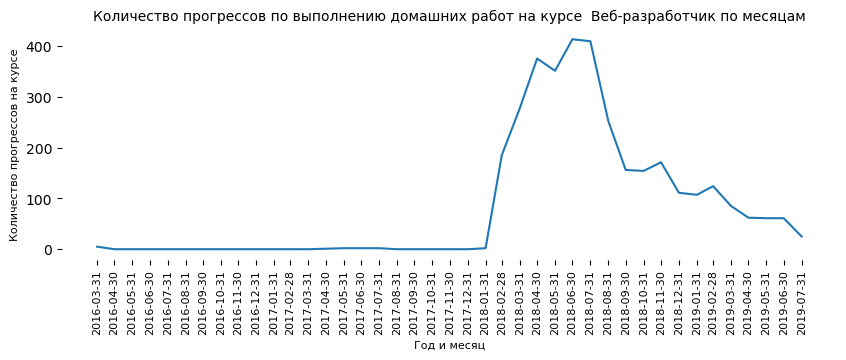

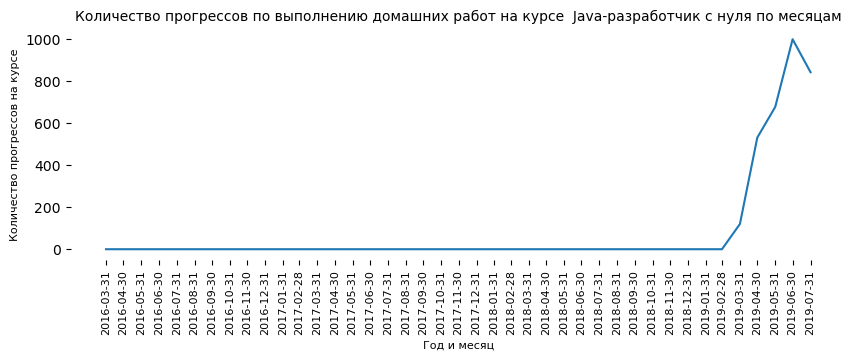

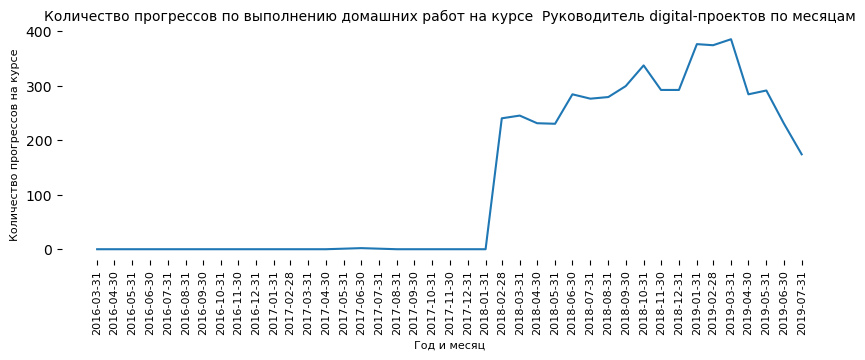

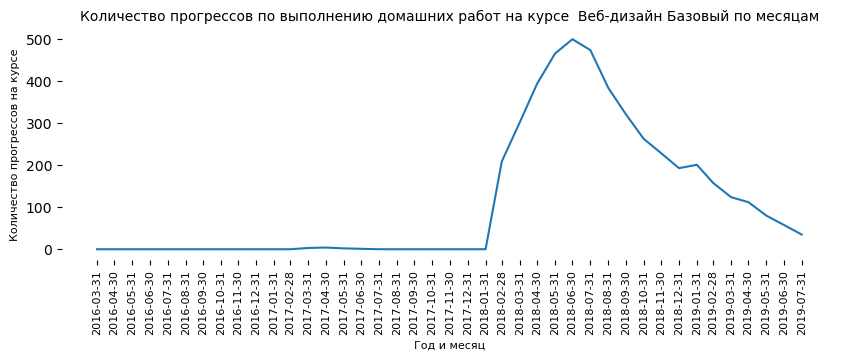

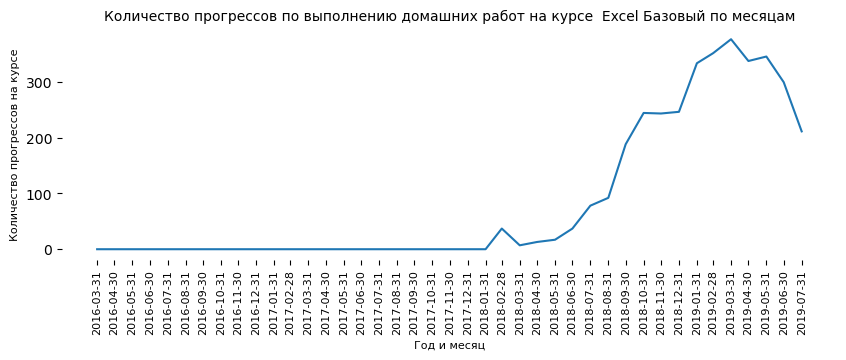

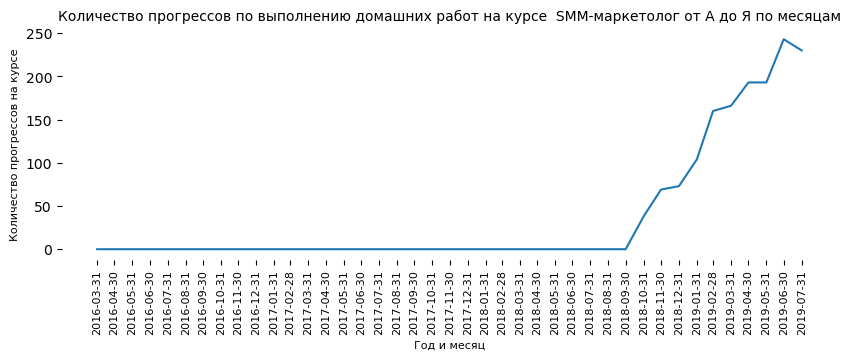

In [21]:
list_courses = list(grouped_date['course_title'].unique())
plt.rcdefaults() 

for i in range(len(list_courses)):
    fig,ax = plt.subplots(figsize = (10,3))
    data = grouped_date[grouped_date['course_title'] == list_courses[i]][['months', 'progress_id']]
    ax.plot(data['months'], data['progress_id'])
    ax.set_ylabel('Количество прогрессов на курсе',size = 8)
    ax.set_xlabel('Год и месяц', size = 8)
    ax.set_title('Количество прогрессов по выполнению домашних работ на курсе  ' + list_courses[i] + ' по месяцам', size = 10)
    ax.set_xticks(data['months'])
    ax.tick_params(axis = 'x', which = 'major', labelsize = 8, labelrotation = 90)
    plt.box(on = None)

    
plt.show();

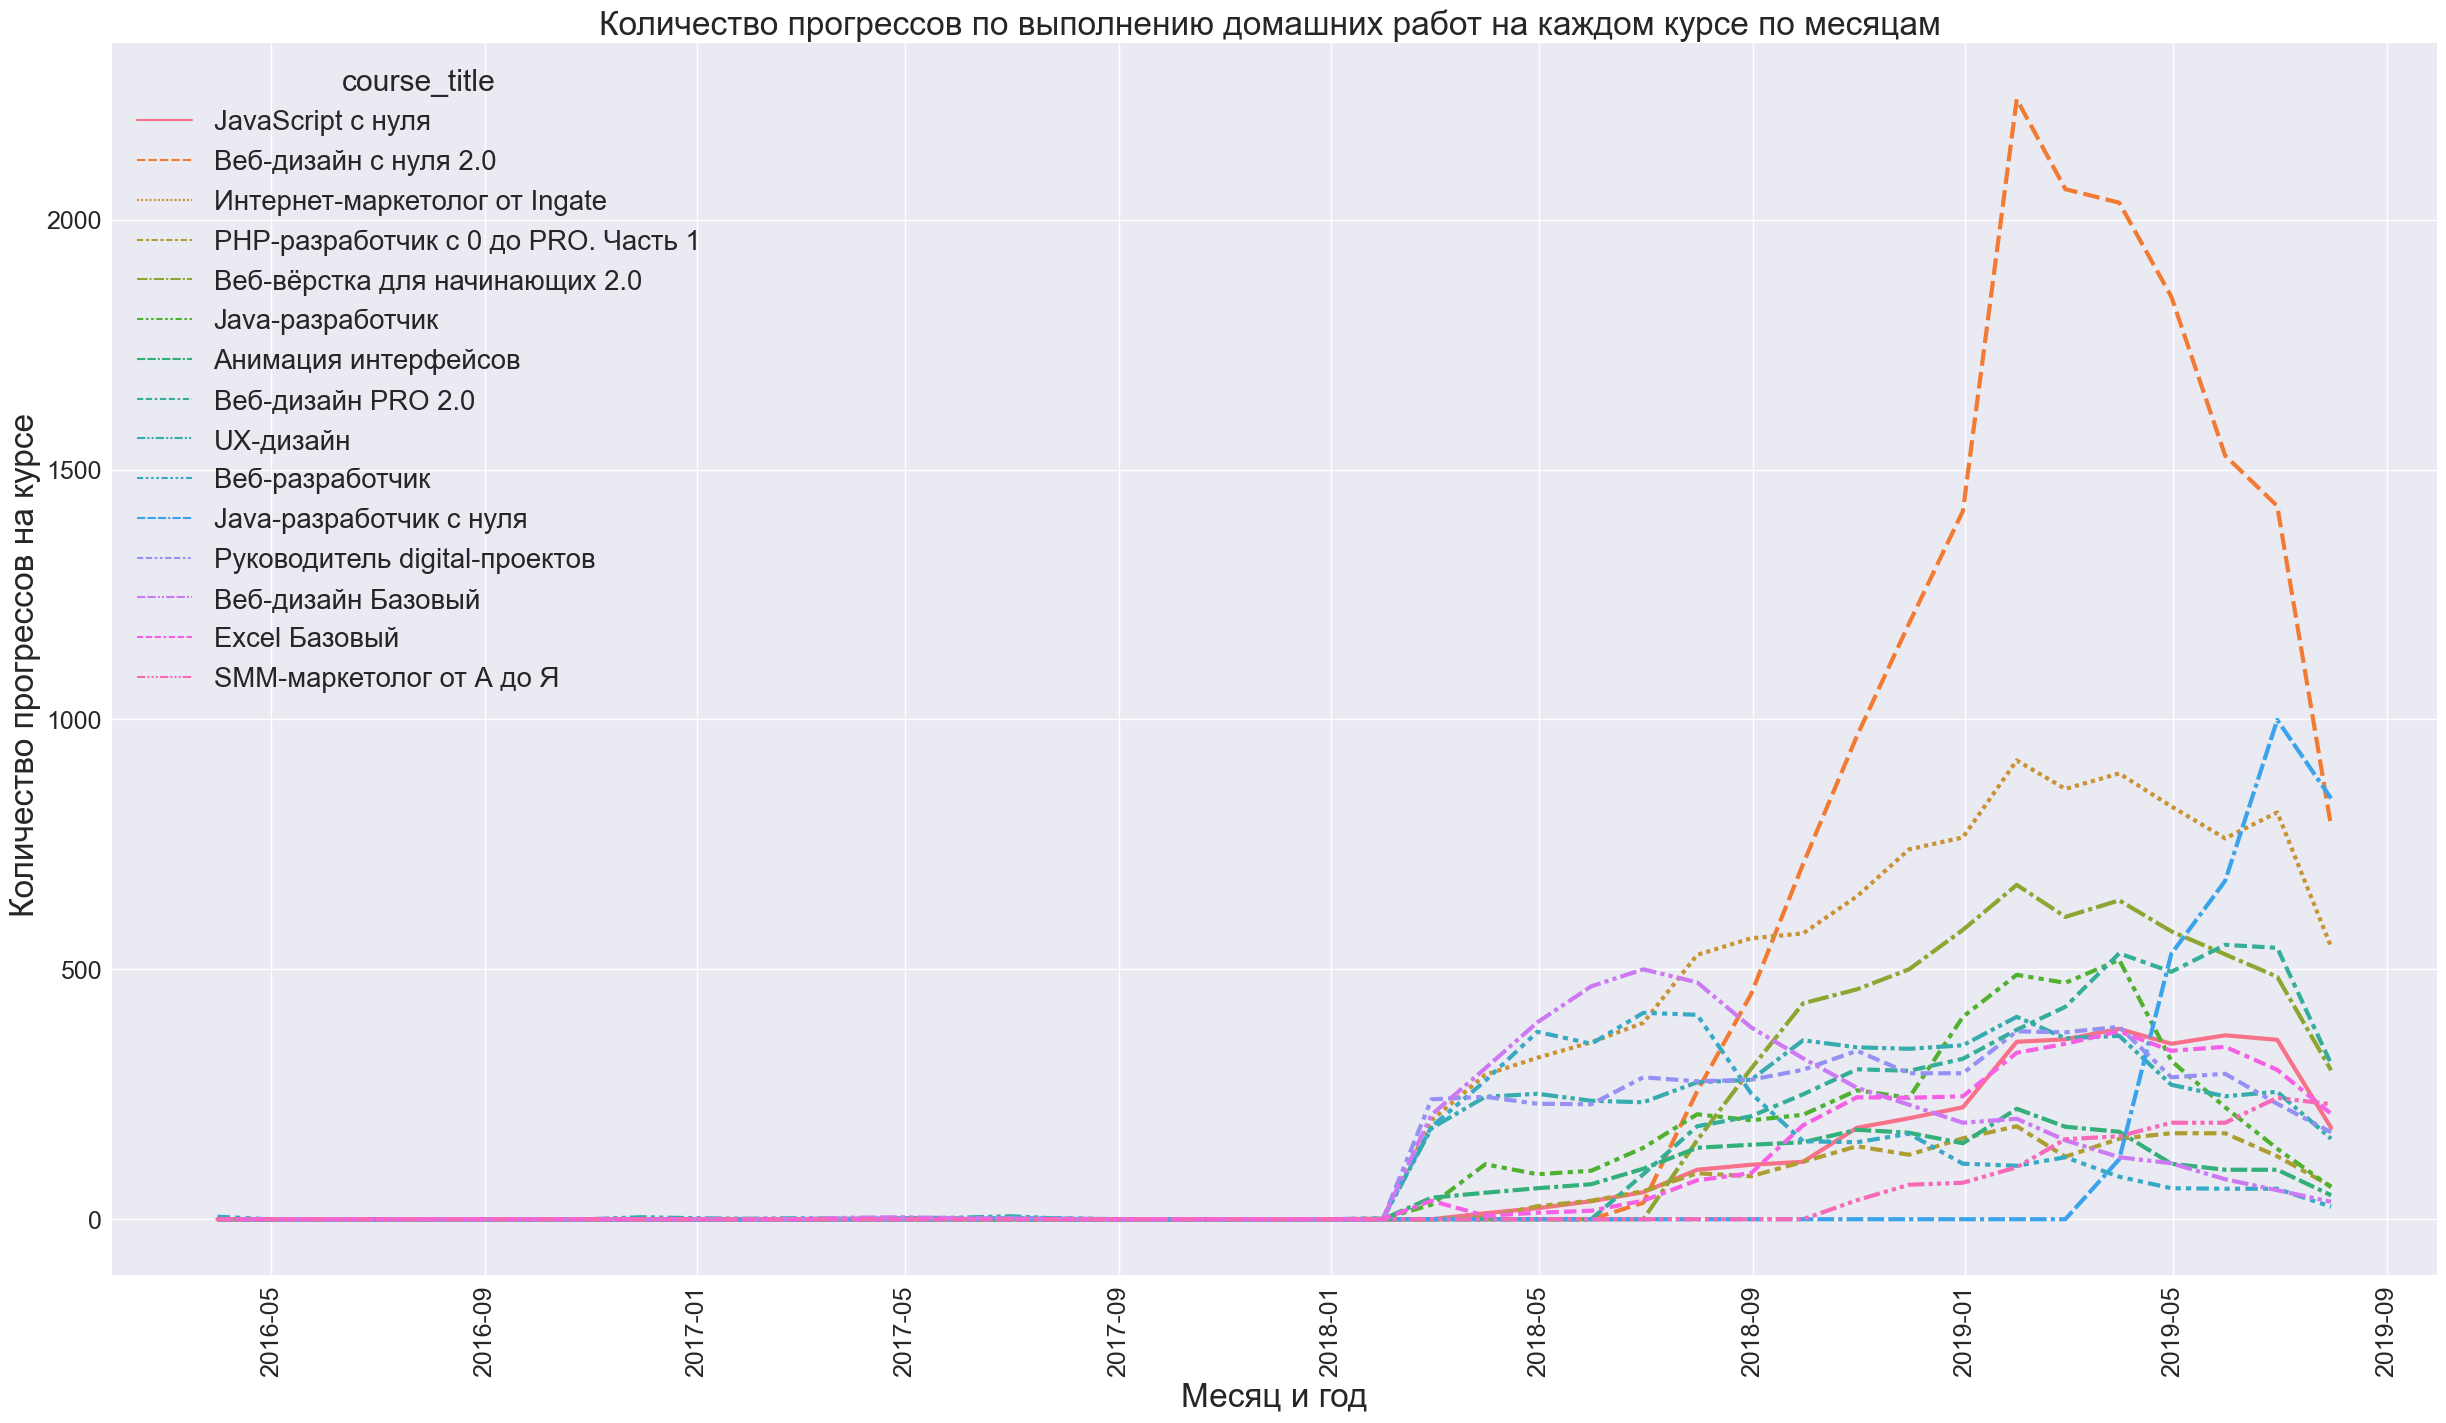

In [23]:
plt.rcdefaults() 
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (30,16))
sns.set(font_scale=1.8)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
    
sns.lineplot(data = grouped_date, x = 'months', y = 'progress_id', hue = 'course_title', style = 'course_title', linewidth = 3)
ax.set_ylabel('Количество прогрессов на курсе ', size = 24)
ax.set_xlabel('Месяц и год', size = 24)
plt.xticks(rotation = 90)
plt.title('Количество прогрессов по выполнению домашних работ на каждом курсе по месяцам ', size = 24)
plt.show();

 На платформе доступны 15 курсов. Перый студент начал прохождение курса по Веб-разработке в марте 2016г, однако до февраля 2018г. наблюдается лишь точечная регистрация студентов, в том числе и на других курсах, из чего можно сделать вывод что в период с марта 2016 по февраль 2018 платформа находилась на стадии разработки, тестировки, отладки. Активный прирост студентов на курсах начался с февраля 2018г.
    
  Из графиков по нашим условиям видно что курсы стартовали в разное время. Самый ранний курс UX-дизайн, первые студенты начали прохождение этого курса в феврале 2018г., максимальный прирост количества студентов наблюдается в январе 2019 года, далее наблюдается снижение количества студентов, что свидетельствует о снижении интереса к данному направдлению. Всего этот курс начали проходить 773 студента. 
  
  Excel Базовый - за все время прирост студентов на данном курсе составил 518 студентов в период с февраля 2018 по июль 2019, первые студенты начали прохождение курса в феврале 2018, однако активный прирост студентов начался с августа 2018г достигнув максимальных значений в марте 2019 - 63 студента, далее прирост постепенно снижался до 28 студентов в июле 2019.
  
  Java-разработчик  - за весь период курс начали проходить 627 студентов. Первые студенты начали прохождение курса в январе 2018, далее наблюдался скачкообразный прирост достигнув своего максимума - 102 студента в декабре 2018. Далее количество студентов резко снизилось, что свидетельствует о неактуальности курса с апреля 2019.  
  
  Java-разработчик c нуля начали проходить 408 студентов в период с марта 2019 по июль 2019. Прирост на курсе сразу показал внушительные темпы по сравнению с другими курсами на платфоме. Если сравнить графики прироста на курсах Java-разработчик и Java-разработчик c нуля, то можно увидеть что период начала прироста количества студентов на последнем совпадает с периодом снижения количества студентов на первом курсе, отсюда можно сделать вывод что студенты с курса Java-разработчик возможно перешли на базовый курс Java-разработчик c нуля, это говорит о том что есть смысл объединить эти два курса и на их базе создать более полный курс. 

  JavaScript с нуля начали проходить 521 студентов в период с марта 2018 по июль 2019. Прирост количества студентов на курсе показывает стабильный рост до января 2019, далее до июня 2019 прирост держится примерно на одном уровне, после наблюдается снижение до 21 человека в июле 2019. Динамика прироста на курсе говорит о том что необходимо обновление курса, добавлении актуальной информации по темам курса, чтобы поддерживать интерес студентов и сохранить положитпльную динамику прироста.
  
   PHP-разработчик с 0 до PRO. Часть 1 начали проходить 391 студент в период с марта 2018 до июля 2019г. Максимальный прирост составил 38 студентов и был зафиксирован в марте 2019 в дальнейшем темпы прироста снижались. Для сохранения положительной динамики прироста необходимо создать вторую часть курса, чтобы студенты прошедшие курс могли углубить знания полученые на данном курсе и далее развиваться в этой области, что позволит в дальнейшем проводить интенсивы, вебинары и практикумы для получения информации об актуальных изменениях в данной сфере деятельности.
   
   SMM-маркетолог от А до Я начали проходить 416 человек в период с октября 2018 по июль 2019. Темпы прироста количества студентов на курсе до июня 2019г показывают стабильный рост и в июне достигают своего максимума - 67 человек, снижаясь в июле 2019 до 46 человек в месяц. Данному курсу так же требуется обновление, либо создание дополнительных интенсивов по теме, введение новых разделов в курс, для того чтобы студенты могли получить новые актуальные знания. Это позволит сохранить положительную динамику прироста и сохранить интерес обучающихся к курсу.  
   
   UX-дизайн
   
   Анимация интерфейсов
   
   Веб-вёрстка для начинающих 2.0 начали проходить 1240 студентов в период с июля 2018 по июль 2019 года. Максимальный рост наблюдался в декабре 2018 - 132 студента, минимальный - в июле 2019 года - 72 студента.
     
   Веб-дизайн PRO 2.0 начали проходить 703 студента в период с июня 2018 по июль 2019. Первые два месяца регистрировалось достаточно большое количество студентов, после прирост количества студентов снижался, а с декабря 2018 пошел прирост достигнув максимального значения в марте 2019 - 69 студентов, после чего вновь наблюдалось снижение прирост. Темпы прироста количества студентов на курсе были неравномерными. 
   
   Веб-дизайн Базовый начали проходить 408 студентов в период с марта 2017 по июль 2019 г. Первые студенты начали прохождение курса в марте 2017г, однако прирост основного количества обучающихся наблюдается в период с февраля по август 2018, далее прирост резко замедляется и к июлю 2019 составляет 2 человека в месяц. Максимальный рост был в мае 2018г. - 68 студентов.
  
  Веб-дизайн с нуля 2.0 начали проходить 1640 студентов в период с июня 2018 по июль 2019гг.  Минимальный прирост наблюдается в стартовый месяц - июнь 2018 - 30 студентов. Максимальный прирост приходится на январь 2019 - 231 студент, далее темпы прироста снижаются и к июлю 2019 составляют 76 студентов. Проанализировав графики прироста на курсах Веб-дизайн Базовый и Веб-дизайн с нуля 2.0  можно сделать вывод что после прохождения базового курса студенты начинают прохождение курса Веб-дизайн с нуля 2.0, для сохранения положительной динамики прироста я бы рекомендовала обновить базовый курс, а так же студентам, прошедшим базовый курс, давать скидку на курс Веб-дизайн с нуля 2.0, либо на основе этих курсов создать новый более полный курс по веб-дизайну.
  Так же создателям платформы я бы рекомендовала сделать упор именно на курсы по веб-дизайну, разработке и ввёрстке и регулярно обновлять контент и делать интенсивы по этими темам, акции при комплексном прохождении курсов по теме, т.к. эти курсы являются самыми многочисленными, что свидетельствует об интересе аудитории к этим направлениям. Это поможет увеличить динамику прироста количества студентов.
  
  Веб-разработчик начали проходить 358 студентов в период с февраля 2018 года по июль 2019г. Максимальный прирост количества студентов наблюдался в июне 2018г. и составил 54 человека, после июня 2018 последовало значительное снижение проироста, с небольшим повышением в ноябре 2018, после чего количество студентов, начинающих прохождение курса, снизилось до 3-4 человек в месяц.
  
  Интернет-маркетолог от Ingate
  
  Руководитель digital-проектов
  

Если смотреть на прогрессы по выполнению домашних работ, то картина кардинально меняется. 

  Самым ранним курсом в этом случае явлеятся Веб-разработчик, т.к. первые прогрессы начаты в марте 2016г, а общее количество прогрессов 2 434, в то время как кличество студентов начавших прохождение всего 7 человек. Максимальный прирост количества прогрессов был отмечен в июне-июле 2018 года (по 333 прогресса). Минимальный - в мае 2017г (1).

  На курсе Руководитель digital-проектов максимальное количество прогрессов было в марте 2019 (276 прогрессов), минимальное - в мае-июле 2017гг (по 1 прогрессу).Всего прогрессов по прохождению - 3 427, что значительно превышает количество студентов начавших выполнение первой дз (даже не смотря на наличие в этом количестве задвоенных позиций, т.к. в общей сложности число процессов длящихся более 1 месяца не критично).
  
  На курсе Excel Базовый зарегистрировано 2887 процессов по прохождению дз в период с февраля 2018 по июль 2019, что значительно превышает показатель количества студентов, начавших прохождение курса(30 человек). Максимальный прирост количества пргрессов наблюдается в марте 2019, минимальный - в марте 2018.
  
  На курсе Веб-дизайн Базовый зарегистировано 2834 прогресса, в то время как количество студентов, начавших прохождение курса, составляет всего 13 человек. Максимальный прирост наблюдается в мае 2018, минимальный - в марте, мае, июне 2018 года.
  
  На курсе UX-дизайн зарегистрировано 3269 прогрессов в период с ноября 2016 по июль 2019, а количество студентов начавших выполнение первой дз всего 2, это говорит о том что основная масса студентов проходят курс не с первого задания и соответственно мы не видим реального количества студентов, обучающихся на курсе. Максимальный прирост наблюдается в марте 2019, минимальный - в конце 2016 года и первой половине 2017.
  
  На курсе JavaScript с нуля наблюдается та же картина, что и  на вышеописанных курсах - количество зарегистрированных прогрессов (2480) значительно превышает количество студентов, начавших прохождение курса с первого дз (1 человек). Максимарьный прирост наблюдается в июне 2019, минимальный - в марте 2018. Так же, при сравнении графиков количества студентов и прогрессов по прохождению, можно увидеть что по первому графику мы не можем видеть реальную картину длительности функционирования курса, т.к. единственный студент начал обучение в июле 2018, а по факту курс действует с марта 2018 по июль 2019 г.
  
  Та же картина будет наблюдаться и по всем остальным курсам.

In [25]:
# Выявление проблемных модулей
# Рассчитываем медианное время прохождения модуля

hw = main[(main['is_homework'] == True) & (main['status'] == 'done')]

module_time = hw.groupby(['student_id', 'course_title', 'module_number']).agg({'start_date':min, 'finish_date':max})\
                        .sort_values(['course_title', 'module_number']).reset_index()
module_time['start'] = module_time['start_date'].values.astype('datetime64[D]')
module_time['finish'] = module_time['finish_date'].values.astype('datetime64[D]')
module_time['transit_time'] = (module_time['finish'] - module_time['start']).dt.days.astype('int16')
module_transit_time = module_time.groupby(['course_title','module_number'])\
                      .agg(minimum = ('transit_time', min), maximum = ('transit_time', max), median = ('transit_time', 'median'))\
                      .reset_index()

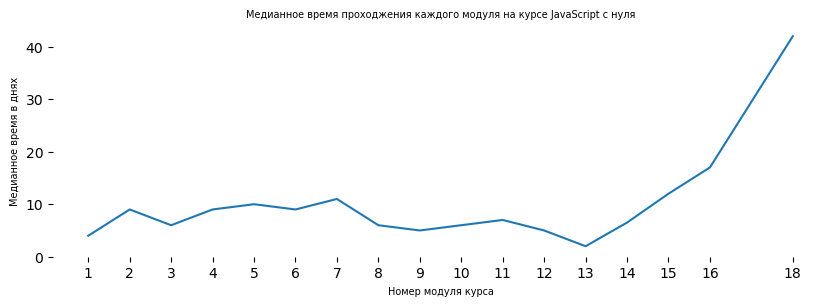

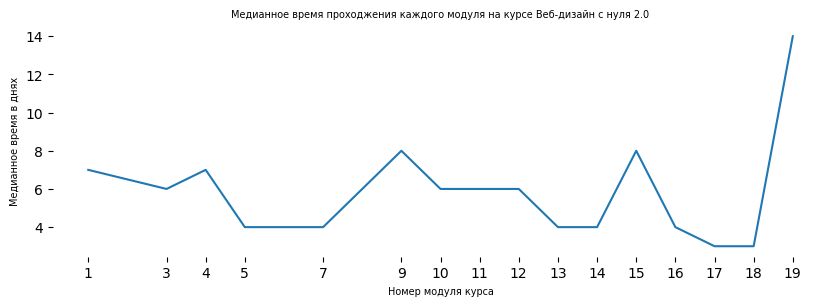

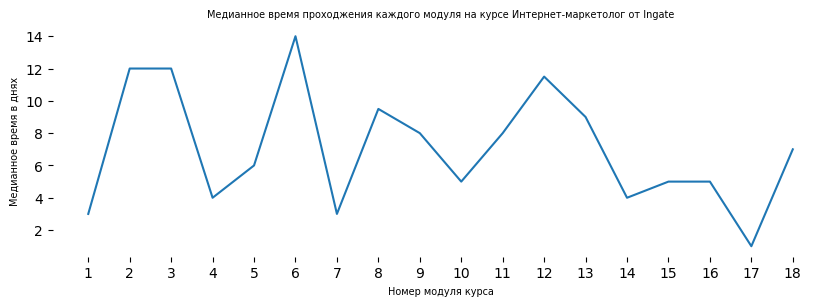

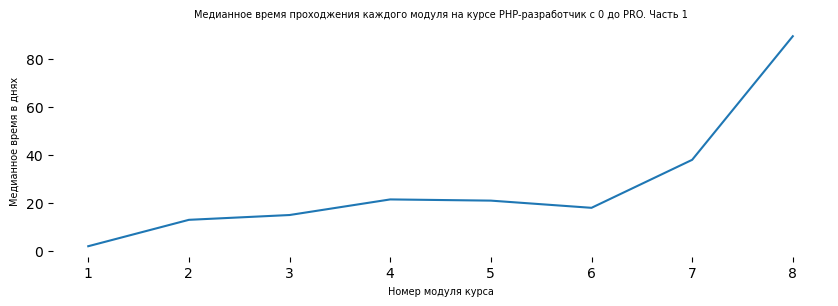

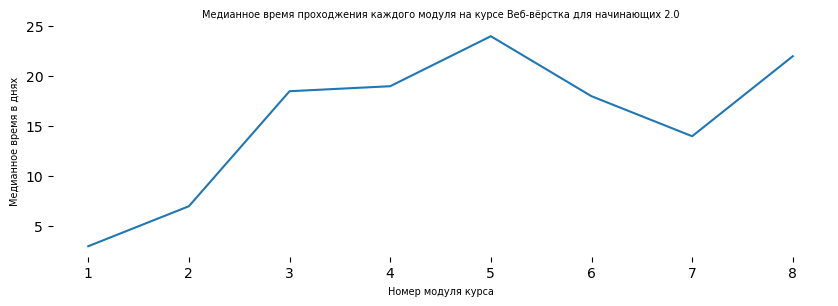

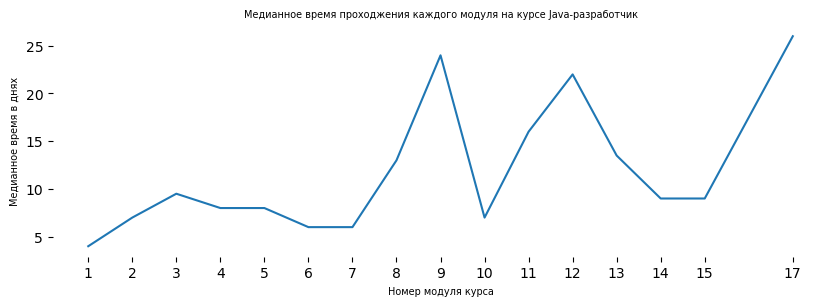

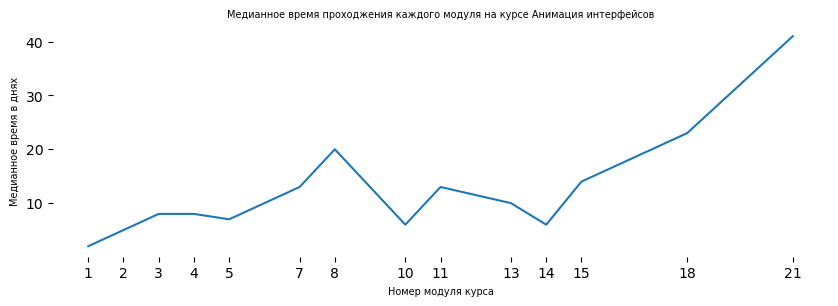

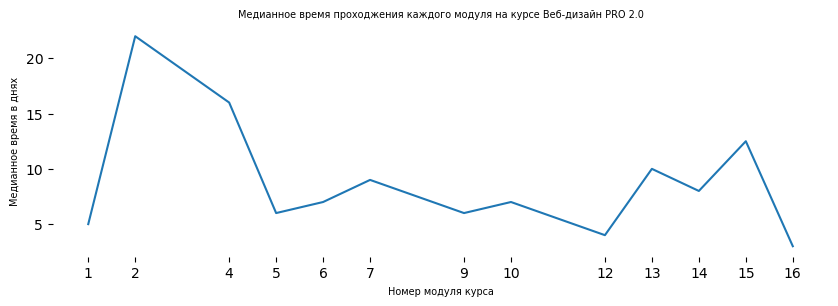

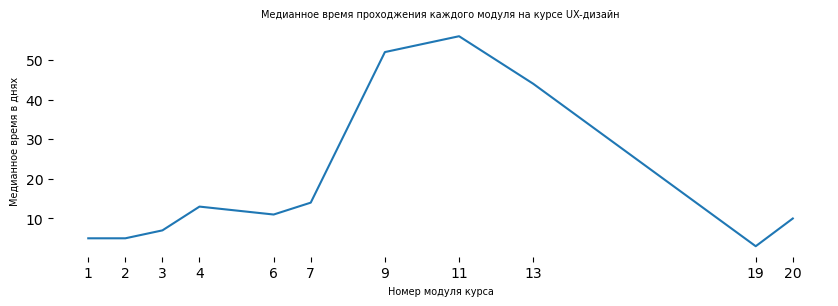

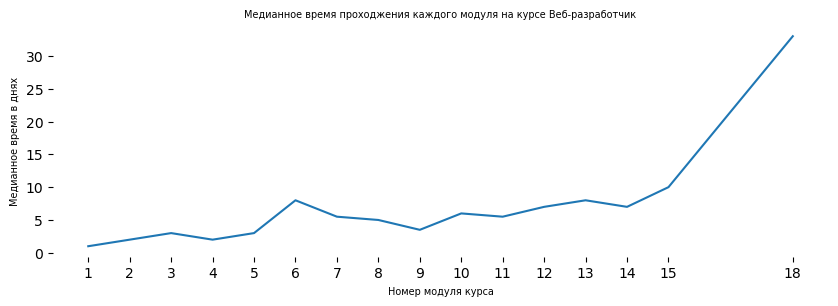

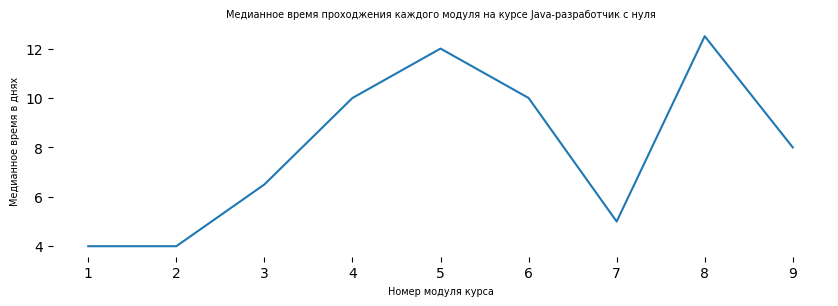

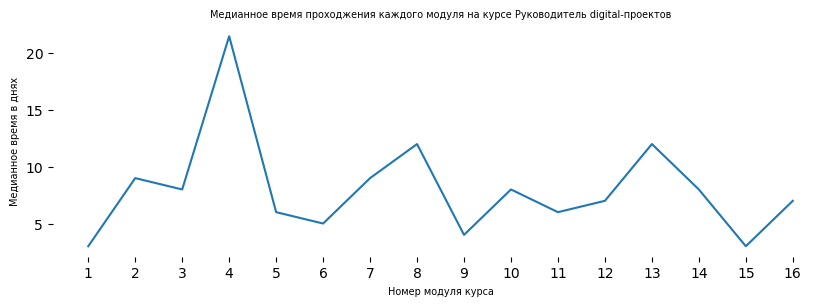

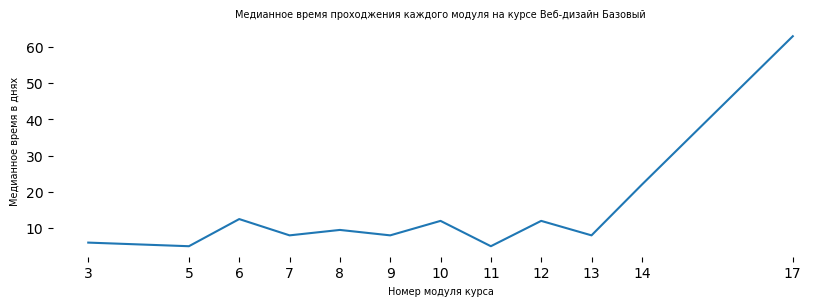

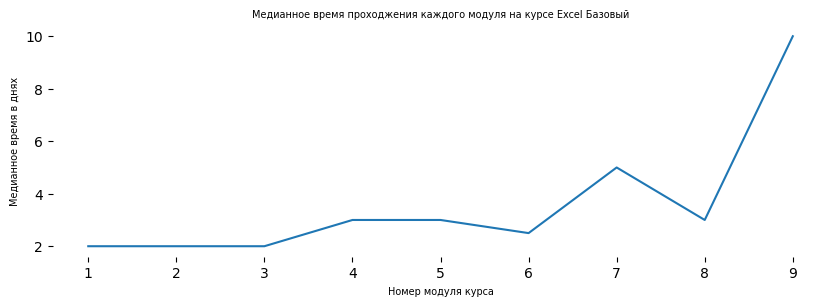

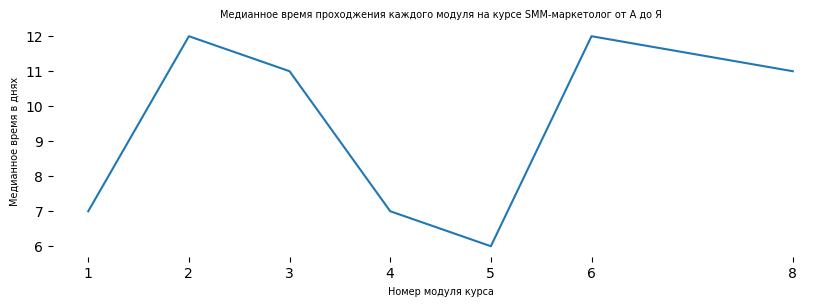

In [26]:
plt.rcdefaults() 

for i in range(len(list_courses)):
    fig, ax = plt.subplots(figsize = (10,3))
    data = module_transit_time[module_transit_time['course_title'] == list_courses[i]][['module_number','median']]
    ax.plot(data['module_number'], data['median'])
    ax.set_ylabel('Медианное время в днях',size = 7)
    ax.set_xlabel('Номер модуля курса', size = 7)
    ax.set_xticks(ticks = list(data['module_number'].unique()))
    ax.set_title('Медианное время проходжения каждого модуля на курсе ' + list_courses[i], size = 7)
    plt.box(on = None)
   
plt.show();

Проанализировав графики можно заметить что медианное время прохождения модулей по курсам сильно варьируется от курса к курсу. Однако на большинстве курсов наблюдается общая тенденция к увеличению времени прохождения к заключительному модулю, что вполне логично, поскольку задания в последних модулях более объемные и сложные. Однако часть курсов имеет обратную тенденцию - время прохождения модуля к заключительному курсу либо снижается, либо остаётся в пределах среднего медианного времени прохождения модулей в целом по всему курсу.

   Рассмотрим более детально каждый курс.

   На курсе ***Excel Базовый*** минимальное время прохождения модуля составляет 0 дней (это касается каждого модуля). Максимальное время прохождения наблюдается в модуле 4 и составляет 327 дней. Медианное время прохождения модуля колеблется в диапазоне значений от 1 до 10 дней. Минимальное медианное время прохождения модуля наблюдается во 2,3 и 1 модулях (1 день, 1 день, 2 дня - соответственно), что вполне логично, т.к. на первых модулях уровень сложности и объем заданий низкий. Наибольшее медианное время прохождения модуля составляет 10 дней и наблюдается в заключительном 9-м модуле, что так же ожидаемо, поскольку объем и уровень сложности уроков и заданий к ним намного больше, нежели в начальных модулях.

   На курсе ***Java-разработчик*** минимальное время прохождения модуля  во всех модулях составляет 0 дней. Максимальное время прохождения наблюдается в модуле 4 и составляет 484 дня, стоит отметить что самые большие значения на данном курсе можно наблюдать в начальных модулях. Минимальное медианное время прохождения модуля наблюдается в модуле 1 - 3 дня, а максимальное  - в заключительном модуле 17 - 26 дней. В целом на курсе наблюдается тенденция увеличения медианного времени прохождения модуля по мере прохождения курса, т.к. и уровень сложности уроков и заданий к ним увеличивается. После 7-го модуля наблюдается резкий рост медианного времени прохождения, что может свидетельствовать о наличии пробелов в знаниях студентов и их неготовности к более сложным темам. Исключение составляют только модули 10, 14 и 15, это может быть связано с более доступным преподнесением информации в уроках, либо её меньшим объемом. Я думаю имеет смысл проанализировать структуру курса и, если понадобится, внести коррективы в программу.

   На курсе ***Java-разработчик c нуля*** в большинстве модулей минимальное время прохождения модуля составляет 0 дней, а в 8 и 9 модулях - 1 день. Максимальное время прохождения наблюдается в модуле 1 и составляет 106 дней. Минимальное медианное время прохождения модуля наблюдается в модулях 1 и 2 и составляет 3 дня. Наибольшее медианное время прохождения модуля составляет 11,5 дней и наблюдается в предпоследнем 8-м модуле, в то время как в поледнем 9-м составляет 8 дней.

   На курсе ***JavaScript с нуля***  в большинстве модулей минимальное время прохождения модуля составляет 0 дней, в модулях 15 и 16 - 3 и 2 дня соответсвенно, а в заключительном 18-м модуле минимальное время прохождения составляет целых 10 дней, что свидетельствует о том, что модуль либо объемный, либо весьма сложный. Максимальное время прохождения наблюдается в 1-м модуле и составляет 352 дня. Так же можно сказать в на данном курсе наблюдается тенденция сокращения максимального времени прохождения модулей к окончанию курса, т.к. наибольшие значения характерны в большей мере для начальных модулей, в то время как ближе к заключительному модулю максимальное время сокращается. Эта тенденция свидетельсвует о увеличении вовлеченности студентов по мере прохождения курса. Что касается медианного времени прохождения модулей, то тут имеет место значительный разброс от 2-х до 41-го дня. В целом в течении курса значения колеблются в диапазоне от 2-х до 10-ти дней, однако к концу обучения медианное время значительно увеличивется до 41-го дня, что подтверждает предположение о  объемности и сложности заключительных модулей.

   На курсе ***PHP-разработчик с 0 до PRO. Часть 1*** минимальное время прохождения модуля сильно варьируется от 0 до 25 дней. Первые 3 модуля самые быстрые студенты проходят за 0 дней, однако после 3-го модуля минимальное время начинает плавно увелививаться, а в заключительном 8-м модуле происходит резкий скачек минимального времени прохождения модуля до 25-ти дней, в сравнении с 4-я днями в 7-м. Максимальное время прохождения наблюдается во 2-м модуле и составляет 314 дней. Наибольшее медианное время прохождения модуля составляет 89 дней и наблюдается в заключительном 8-м модуле. В целом на курсе достаточно большие медианные значения времени прохождения модулей, минимальное значение - 1 день в 1-м модуле, а далее значения только растут, при чем значительно - во 2-м и 3-м уже по 14-ть дней, наиболее резкий скачок значения происходит в последнем 8-м модуле. Исходя из полученных данных можно говорить что курс является достаточно сложным для студентов и требует много времени для изучения.

   На курсе ***SMM-маркетолог от А до Я*** минимальное время прохождения модуля составляет 0-1 день. Максимальное время прохождения модулей колеблется в диапазоне от 20 до 189 дней. Медианные значения времени прохождения модулей находятся в диапазоне значений от 5 до 12-ти дней. В целом на курсе не наблюдается какой-то четкой тенденции.

   На курсе ***UX-дизайн*** минимальное время прохождения модуля во всех модулях составляет 0 дней. Максимальное время прохождения модулей колеблется в диапазоне от 50 до 389 дней. Так же следует отметить что в большинстве модулей максимальное время прохождения превышает 300 дней. Медианное время прохождения модуля имеет значительный разброс значений от 4-х до 62-х дней. В целом наблюдается тенденция роста медианного значения к середине курса и снижения к заключительным модулям.

   На курсе ***Анимация интерфейсов*** минимальное время прохождения модуля составляет 0 дней, за исключением заключительного 21-го модуля - 6 дней. Максимальное время прохождения модулей колеблется в диапазоне от 64 до 335 дней. Медианное время прохождения модуля имеет разброс значений от 1-го до 40-а дней. В целом наблюдается тенденция роста медианного значения к заключительным модулям, за исключением пика в районе 7-8 модулей.

   На курсе ***Веб-вёрстка для начинающих 2.0*** минимальное время прохождения модуля составляет 0-1 день. Максимальное время прохождения модулей колеблется в диапазоне от 211 до 312 дней. Медианное время прохождения модуля имеет разброс значений от 3-x до 24-x дней. C 1-го модуля наблюдается резкий рост медианного времени с 3-х дней до 24-х в 5-м модуле, далее в 6 и 7 модулях медианное время снижается до 18 и 14 дней соответственно. В 8 модуле медианное время прохождения модуля составляет 22 дня.

   На курсе ***Веб-дизайн PRO 2.0*** минимальное время прохождения модуля составляет 0 дней, за исключением 2-го модуля - 1 день. Максимальное время прохождения модулей колеблется в диапазоне от 22 до 363 дней. Медианное время прохождения модуля имеет разброс значений от 2-x до 22-x дней. На данном курсе в среднем медианное время прохождения модуля составляет 7 дней, наиболее трудоемкими модулями для студентов являются 2,4 и 15-й с медианным временем 22, 16 и 12 дней соответственно.
   
   На курсе ***Веб-дизайн Базовый*** минимальное время прохождения модуля составляет 0 дней, за исключением заключительного 17-го модуля - 9 дней. Максимальное время прохождения модулей колеблется в диапазоне от 108 до 425 дней. Медианное время прохождения модуля имеет разброс значений от 5 до 62,5 дней. В целом наблюдается тенденция резкого роста медианного значения от 13-го модуля и до заключительного 17-го модуля. Что вполне объяснимо, т.к. в последних модулях задания более объемные и трудоёмкие.
    
   На курсе ***Веб-дизайн с нуля 2.0*** минимальное время прохождения модуля во всех модулях составляет 0 дней. Максимальное время прохождения модулей колеблется в диапазоне от 100 до 333 дней. Медианное время прохождения модуля имеет разброс значений от 2-х до 14-и дней. В целом в течении курса наблюдается переодическое колебание значений от модуля к модулю в пределах недели, с резким ростов в 19-м модуле до 14 дней.
    
   На курсе ***Веб-разработчик*** минимальное время прохождения модуля составляет 0 дней, за исключением заключительного 18-го модуля - 32 дней. Максимальное время прохождения модулей колеблется в диапазоне от 108 до 344 дней. Медианное время прохождения модуля имеет разброс значений от 1-го до 115-и дней. В целом в течении курса наблюдается переодическое колебание значений от модуля к модулю в пределах недели, начиная с 15-го модуля наблюдается резкий рост медианного значения с 16-ти дней до 115 дней в заключительном 18-м модуле.
    
  На курсе ***Интернет-маркетолог от Ingate*** минимальное время прохождения модуля составляет 0 дней, за исключением заключительного 18-го модуля - 1 день. Максимальное время прохождения модулей колеблется в диапазоне от 17 до 464 дней. Медианное время прохождения модуля имеет разброс значений от 2-х до 15-и дней. В целом на курсе не наблюдается какой-то четко выраженной тенденции изменения медианного времени прохождения модуля.
    
   На курсе ***Руководитель digital-проектов*** минимальное время прохождения модуля во всех модулях составляет 0 дней. Максимальное время прохождения модулей колеблется в диапазоне от 78 до 457 дней. Медианное время прохождения модуля имеет разброс значений от 2-х до 23-х дней. В целом на курсе не наблюдается какой-то четко выраженной тенденции изменения медианного времени прохождения модуля.

In [27]:
# Выявляем с сезонность активности на курсах

def counts(data):
    counts = {}
    
    for i in range(len(data)):
        df = data.tolist()
        if df[i].month_name() in counts:
             counts[df[i].month_name()] += 1
        else:
             counts[df[i].month_name()] = 1
            
    return counts

In [28]:
hw_season = hw.groupby(['student_id','course_title','module_number','lesson_number'])\
              .agg({'start_date':min, 'finish_date':max}).reset_index()

hw_season['start_date'] = [hw_season['start_date'][i].date() for i in range(len(hw_season['start_date']))]
hw_season['finish_date'] = [hw_season['finish_date'][i].date() for i in range(len(hw_season['finish_date']))]

hw_season['range'] = hw_season.apply(lambda x: pd.date_range(x["start_date"],
                                             x["finish_date"], freq="D"), axis=1)
hw_season['deltas'] = hw_season['range'].apply(counts)
hw_season['M'] = hw_season['deltas'].apply(lambda x: list(x.keys()))
hw_season['D'] = hw_season['deltas'].apply(lambda x: list(x.values()))
hw_season = hw_season.explode(list('MD'))
hw_season = hw_season.drop(['range','deltas'], axis = 1)

In [29]:
sesionality = hw_season.groupby(['course_title','M']).agg({'D':'median'}).reset_index()
sesionality['M'] = pd.to_datetime(sesionality.M, format='%B', errors='ignore').dt.month

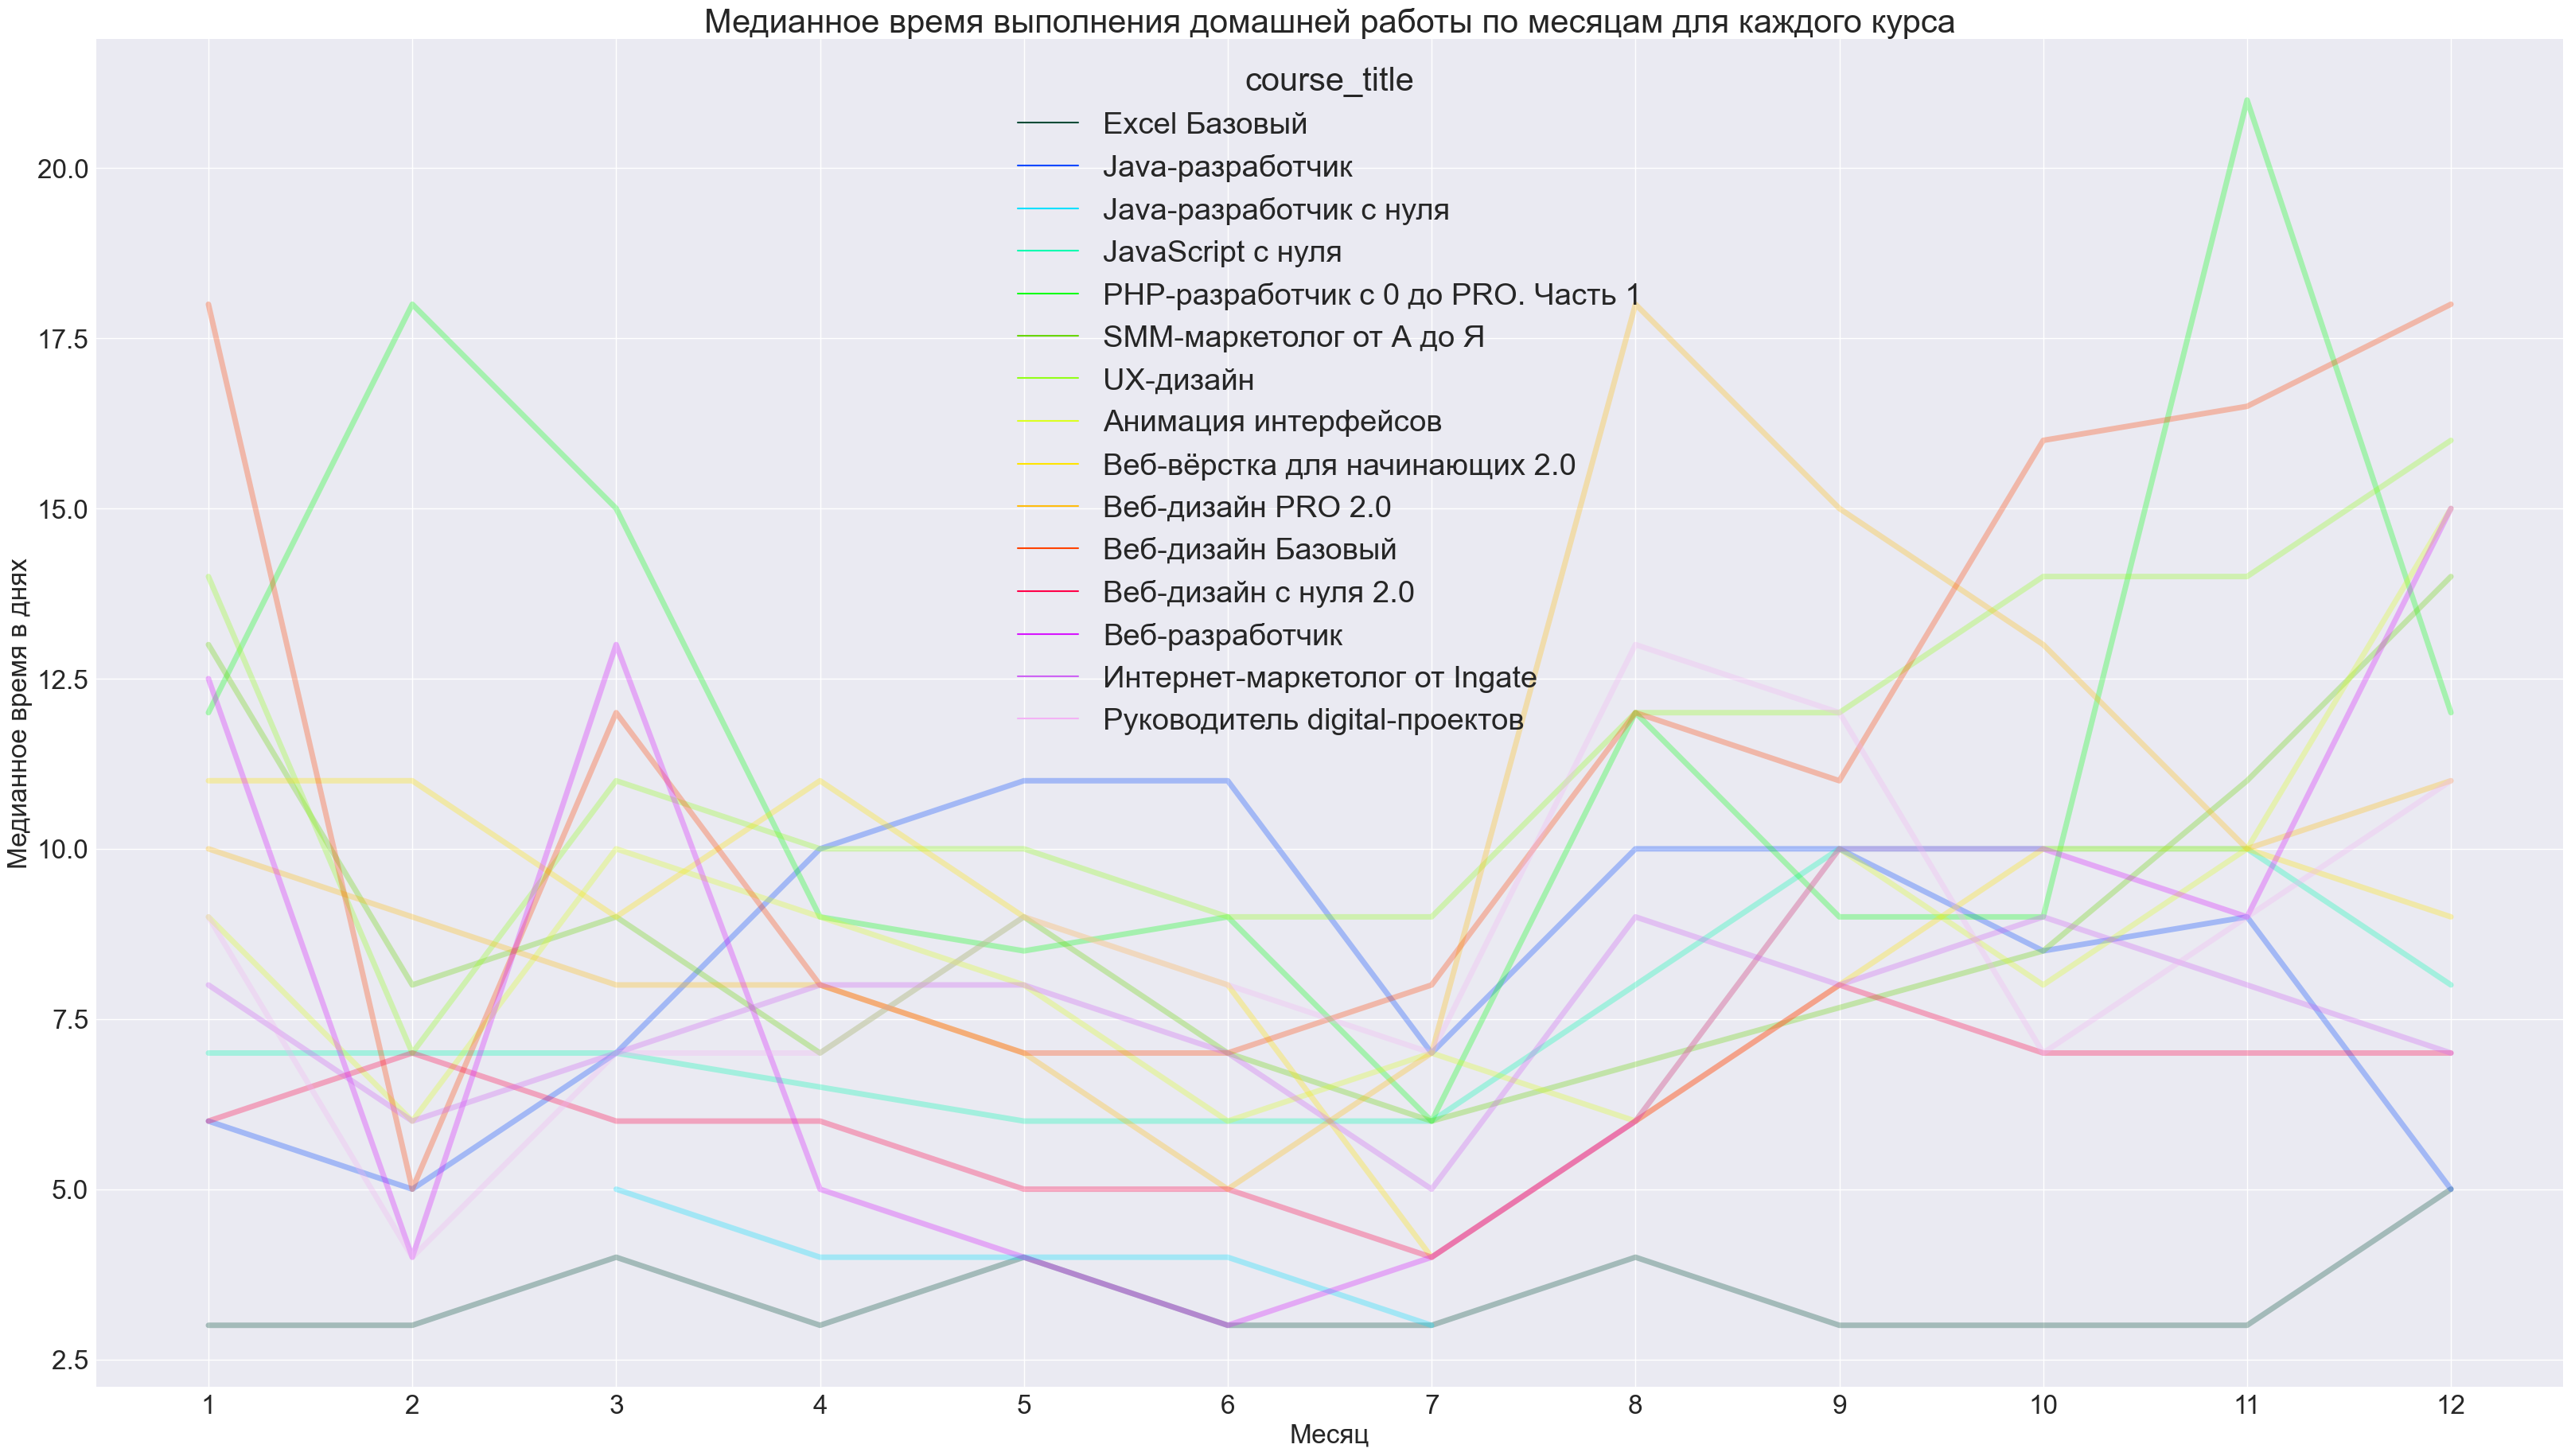

In [37]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (40,22))
sns.set(font_scale= 2.5)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

colors = sns.set_palette(palette = "gist_ncar", n_colors = 15)

sns.lineplot(data = sesionality, x = 'M', y ='D', hue = 'course_title', linewidth = 5, palette = colors, alpha = 0.3)

ax.set_ylabel('Медианное время в днях', size = 24)
ax.set_xlabel('Месяц', size = 24)

plt.xticks(list(sesionality['M'].unique()))
plt.title('Медианное время выполнения домашней работы по месяцам для каждого курса', size = 30)


plt.show();

В целом на платформе не наблюдается явной сезонности, однако если рассмотреть детально каждый курс, то можно сказать что на некоторых курсах всё же наблюдается некоторая сезонность.
Рассмотрим каждый курс отдельно.

На курсе ***Excel Базовый***  не наблюдается ярковыраженной сезонности обучения, за исключением пиков в нескольких месяцах. В марте, мае, августе и декабре медианное время выполнения домашних работ увеличивается в 1,5-2 раза, в сравнении с остальми месяцами. Думаю это связано с длинными выходными в марте и мае, сезоном отпусков в августе и новым годом в декабре.

На курсе ***Java-разработчик***  в среднем в течении года медианное время выполнения домашних работ составляет 8 дней. Исходя из графика можно утверждать что наблюдается колебание времени выполнения домашних заданий в зависимости от сезона, а точнее - с декабря по март, а так же в июле студенты быстрее выполняют домашние работы.

На курсе ***Java-разработчик c нуля*** медианные значения времени выполнения домашней работы имеют тенденцию к снижению с марта по июль. 

На курсе ***JavaScript с нуля*** наблюдается явная сезонность, выражающаяся в снижении медианного времени выполнения домашних работ летом и резком росте  - осенью.

На курсе ***PHP-разработчик с 0 до PRO. Часть 1*** с апреля по октябрь студенты наиболее активны и быстрей выполняют домашние работы. Наибольшее медианное время выполнения домашних рабои наблюдается в феврале и ноябре.

На курсе ***SMM-маркетолог от А до Я*** так же наблюдается наибольшая активность в период с февраля по октябрь. Наименьшее медианное значение времени выполнения домашней работы в июле, а следовательно именно в этом месяце студенты наиболее вовлечены в учебгый процесс.

На курсе ***UX-дизайн*** медианные значения времени выполнения домашних заданий в летние месяцы значительно ниже, чем в остальные, за исключением февраля - в феврале наблюдаются наименьшее медианное значение.

На курсе ***Анимация интерфейсов*** наибольшая активность студентов наблюдается в летние месяцы, а так же в феврале.Наименьшая вовлеченность ожидаемо в конце года, а так же в марте.

На курсе ***Веб-вёрстка для начинающих 2.0*** в течении года незначительное колебание медианного времени выполнения домашних заданий, за исключением июля - студенты в этом месяце наиболее вовлечены и выполняют домашние работы значительно быстрей.

На курсе ***Веб-дизайн PRO 2.0*** в первой половине года студенты наиболее активны, с середины года активность значительно снижается, немного восстанавливаясь в декабре.





In [31]:
# Рассчет конверсии перехода студентов из одного модуля в другой на каждом курсе.

raw_conv = main[main['is_homework'] == True]\
       [['student_id','course_title','module_number','lesson_number','course_field','status']].copy()

first_les = raw_conv.groupby(['course_title','module_number','course_field'])\
               .agg(les = ('lesson_number', min), st_count = ('student_id','count')).reset_index()

final_les = raw_conv[raw_conv['status'] == 'done'].groupby(['course_title','module_number','course_field'])\
                                          .agg(les = ('lesson_number', min), st_count = ('student_id','count'))\
                                          .reset_index()

counts_st_by_month = first_les.merge(final_les, on = ['course_title','module_number','course_field'], \
                                     suffixes = ['_start', '_finish'], how = 'inner')

In [32]:
list_courses = list(counts_st_by_month['course_title'].unique())
conv = {}
for i in range(len(list_courses)):
    course = list_courses[i]
    df = counts_st_by_month[counts_st_by_month['course_title'] == course].reset_index()
    module = []
    current_conv = []

    for j in range(len(df)):     
        if df['module_number'].loc[j] == df['module_number'].min():
            module.append(df['module_number'][j])
            current_conv.append(0)
            conv[course] = [module,current_conv]
        else:
            conversion = np.round(df['st_count_start'][j]/df['st_count_finish'][j-1],3)       
            module.append(df['module_number'][j])
            current_conv.append(conversion)

In [33]:
conversion = pd.DataFrame(conv).transpose()
conversion = conversion.explode([0,1]).reset_index()
conversion = conversion.rename(columns = {'index':'course_title', 0:'module_number', 1:'conversion'})
conversion.head(5)

course_title module_number conversion
0  Excel Базовый             1          0
1  Excel Базовый             2      0.948
2  Excel Базовый             3       0.98
3  Excel Базовый             4      0.891
4  Excel Базовый             5      0.983

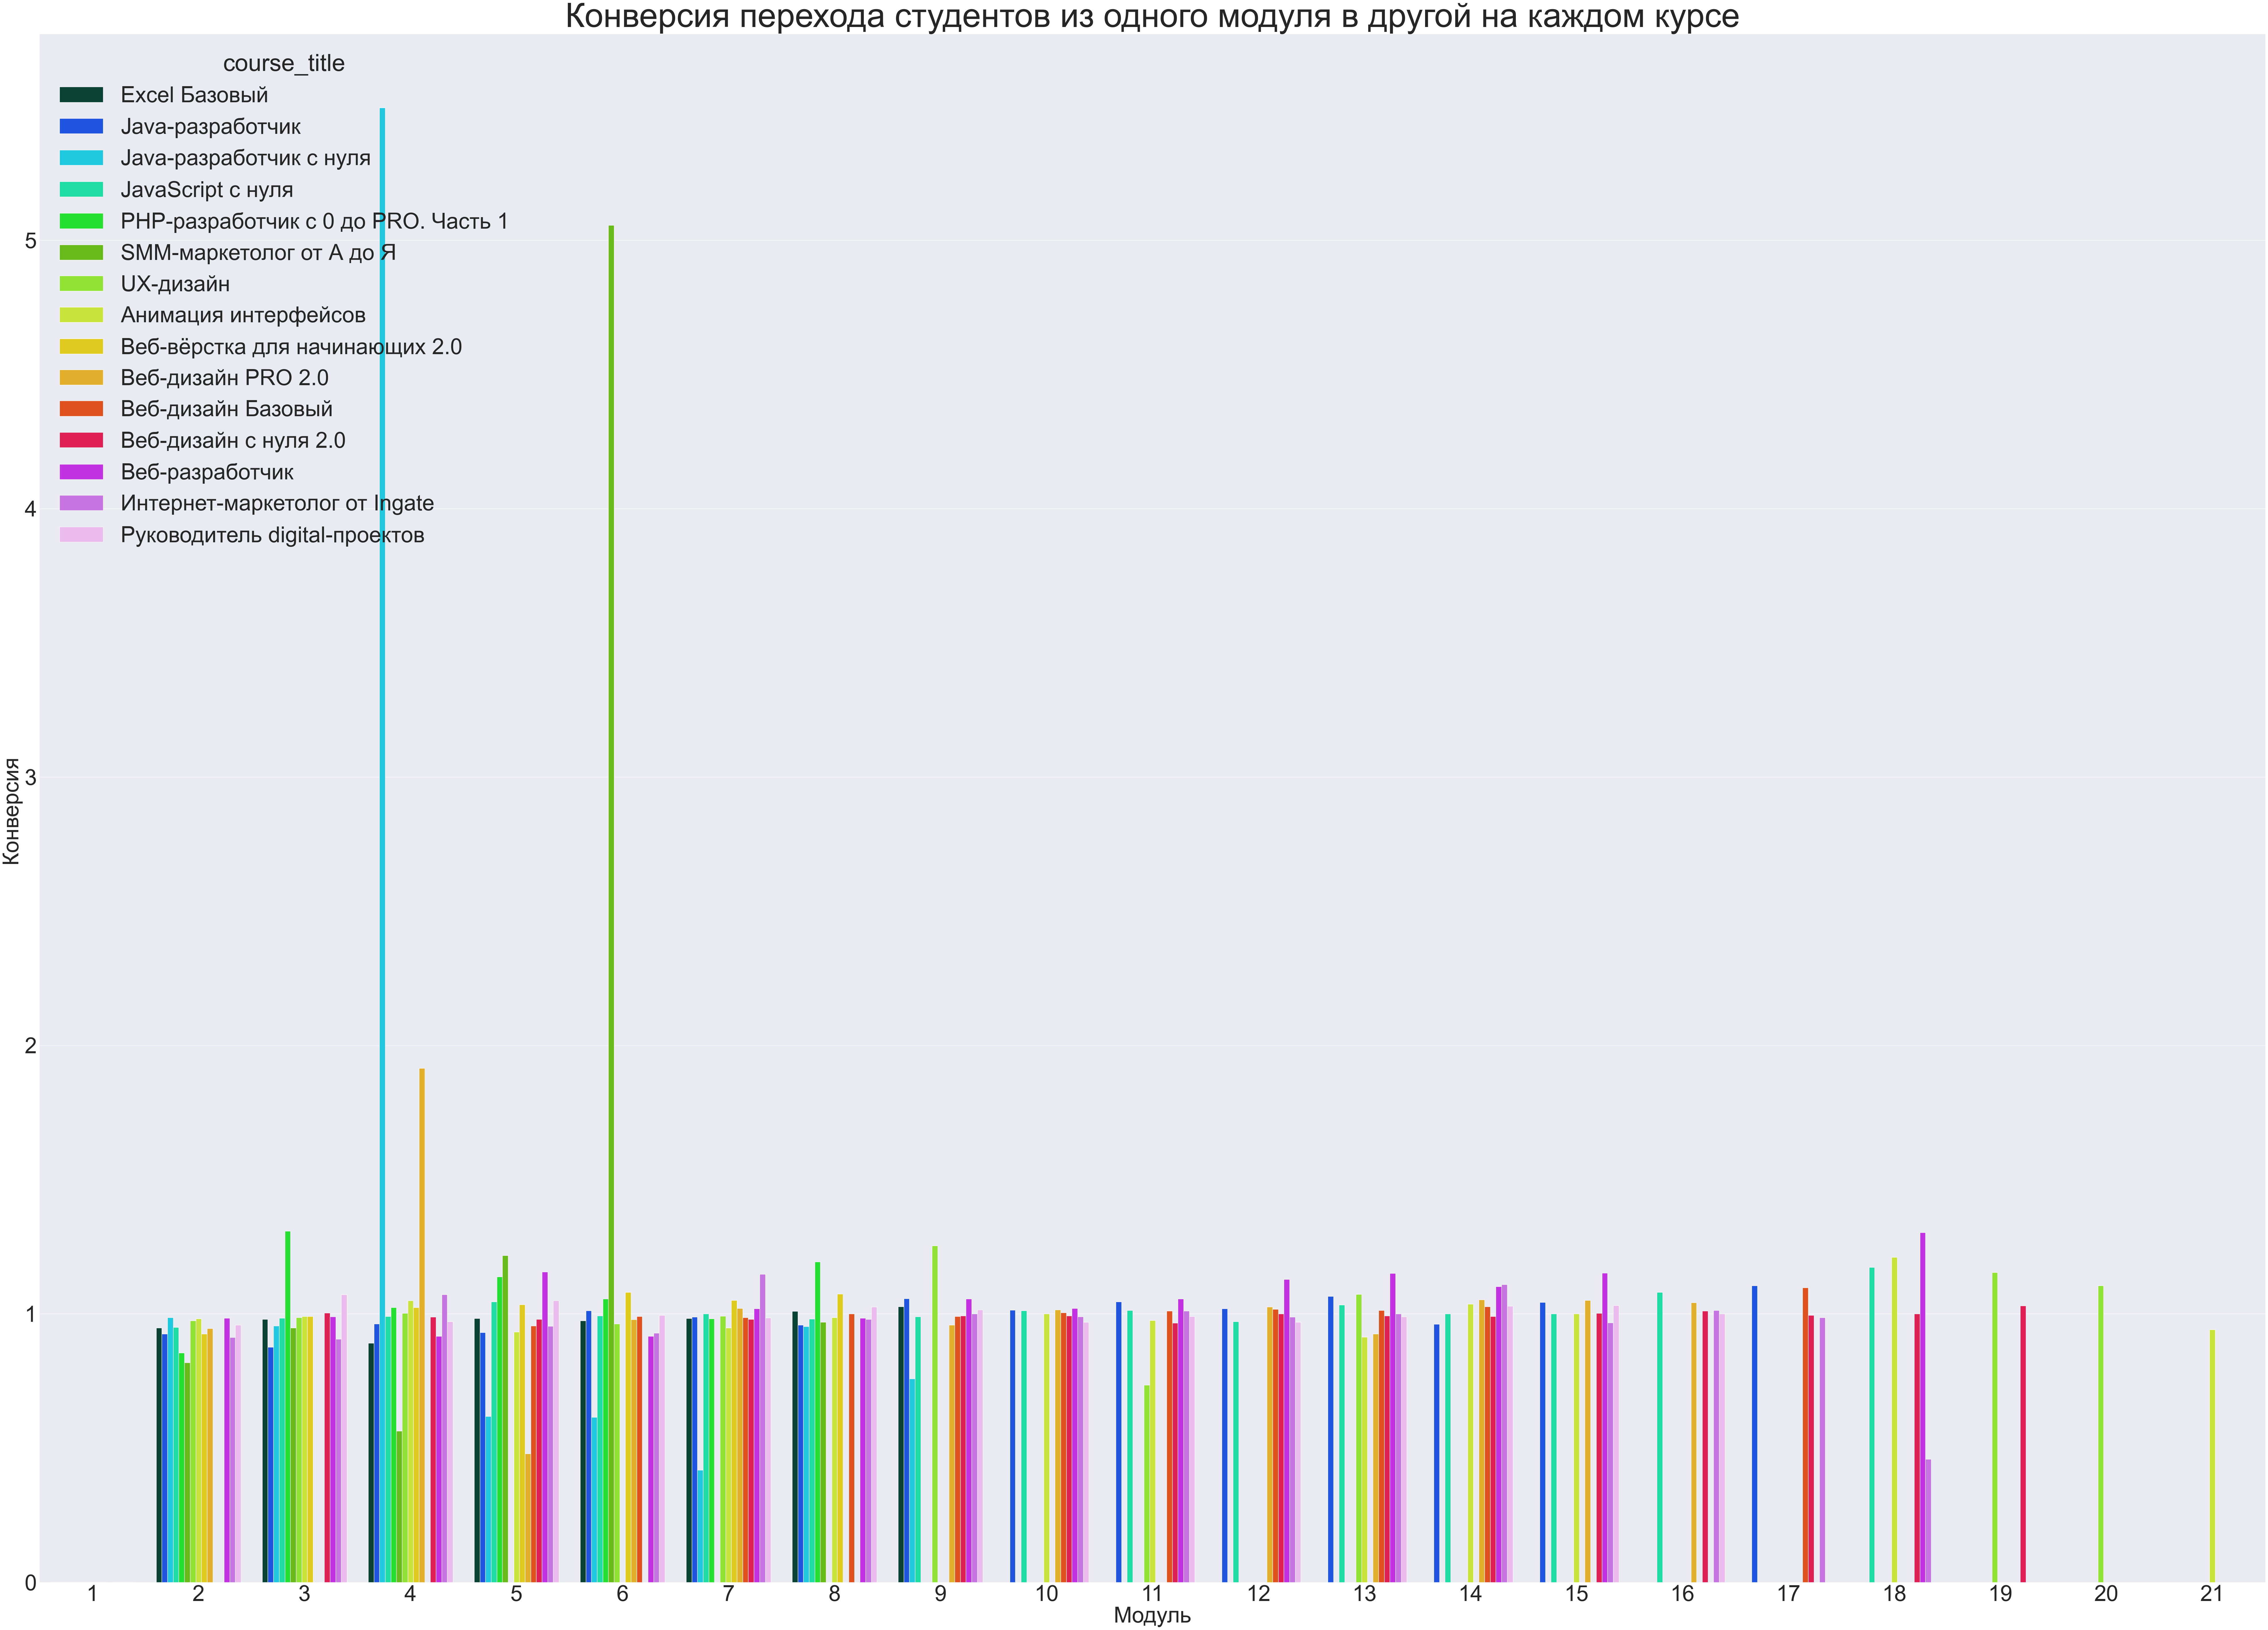

In [34]:
plt.rcdefaults()
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (100,70))
sns.set(font_scale= 5)
colors = sns.set_palette(palette = "gist_ncar", n_colors = 15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(55)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(55)
    
sns.barplot(data = conversion, x = 'module_number', y = 'conversion',palette = colors, hue = 'course_title')
ax.set_ylabel('Конверсия ', size = 55)
ax.set_xlabel('Модуль', size = 55)
plt.title('Конверсия перехода студентов из одного модуля в другой на каждом курсе', size = 84)
plt.show();

In [35]:
field = counts_st_by_month.groupby(['course_title','course_field']).agg(count = ('course_title',"count")).reset_index()
field = field.drop('count', axis = 1)
conversion = conversion.merge(field, on = 'course_title')

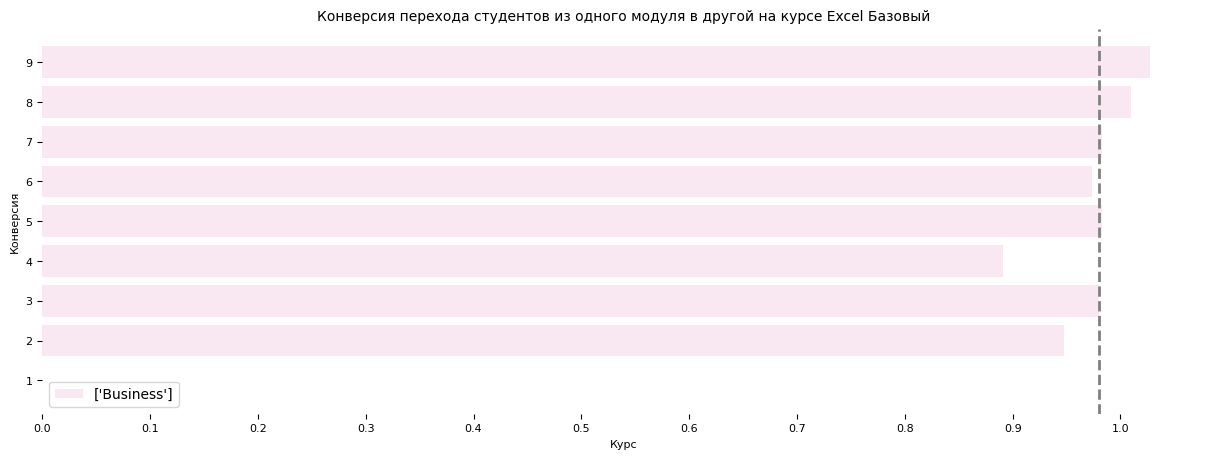

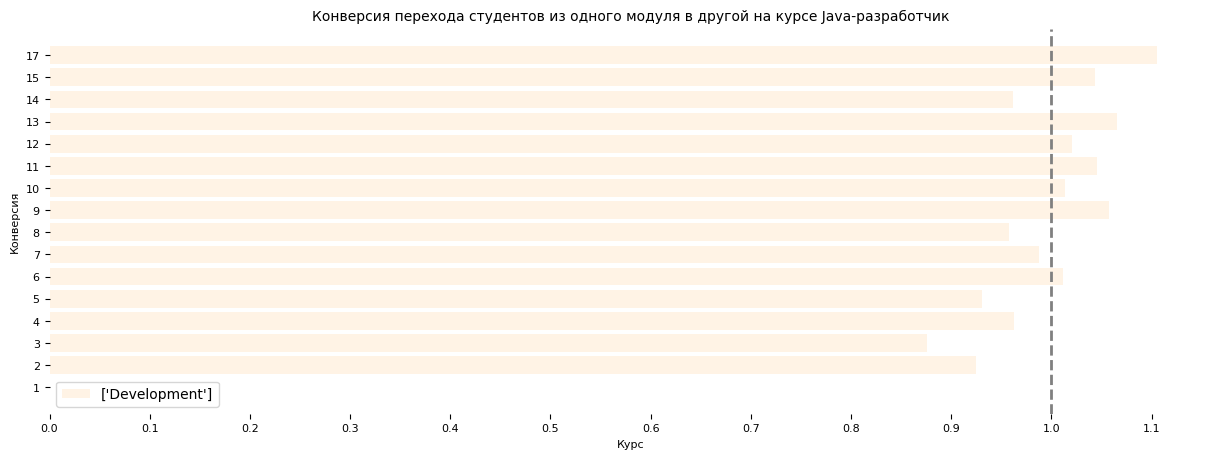

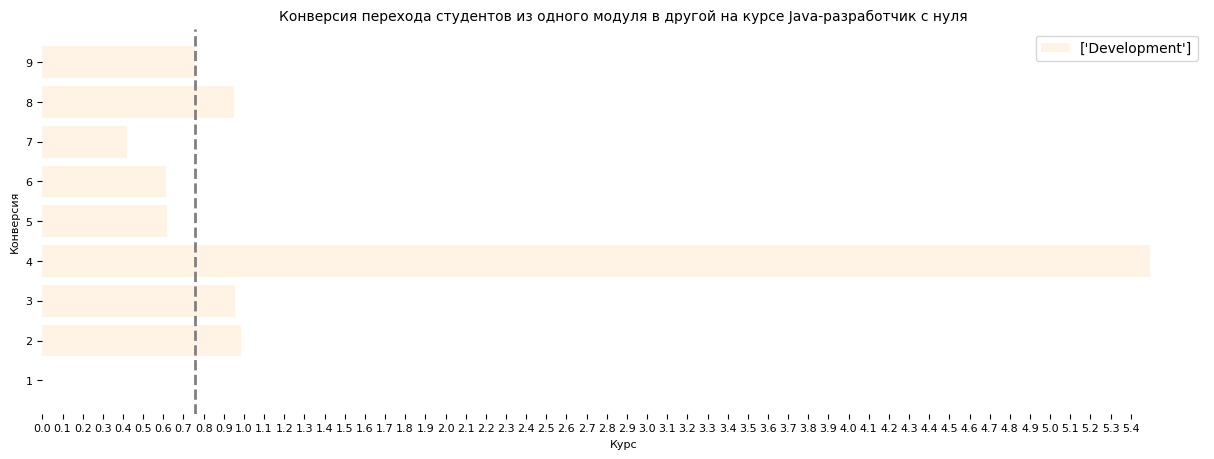

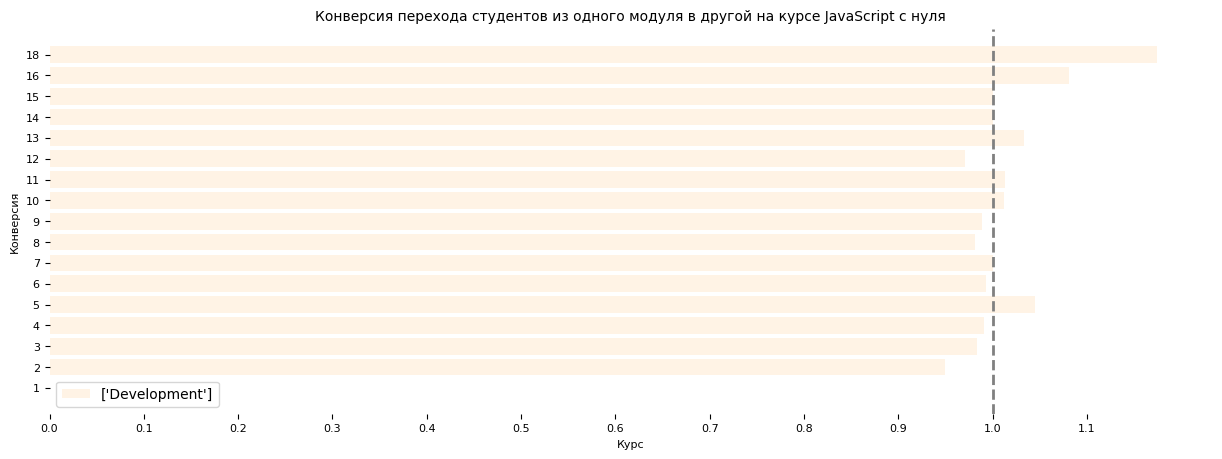

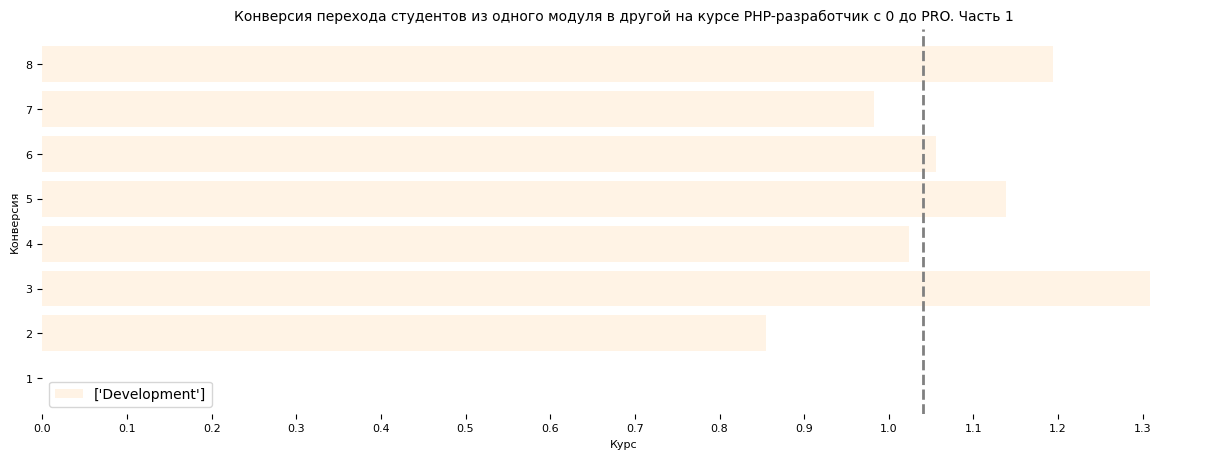

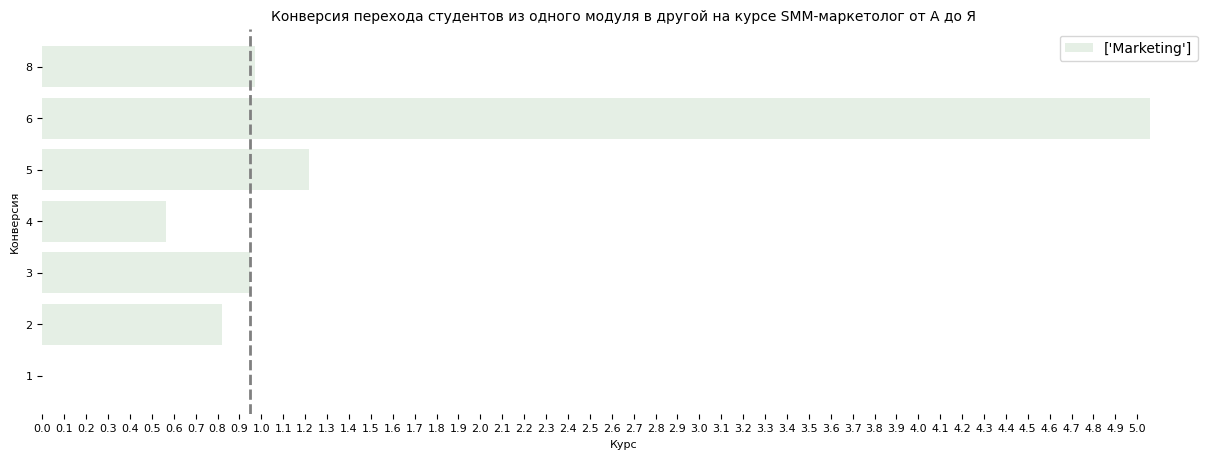

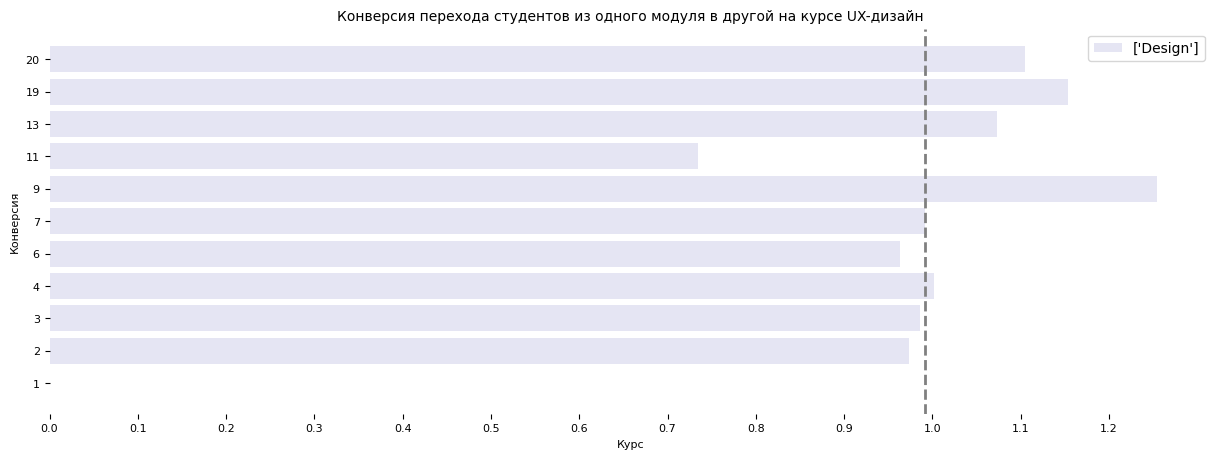

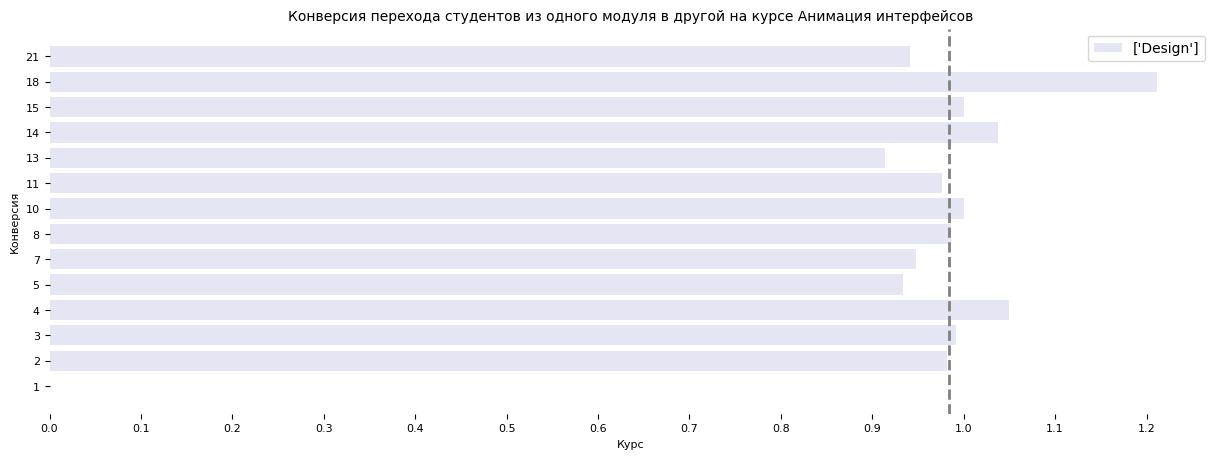

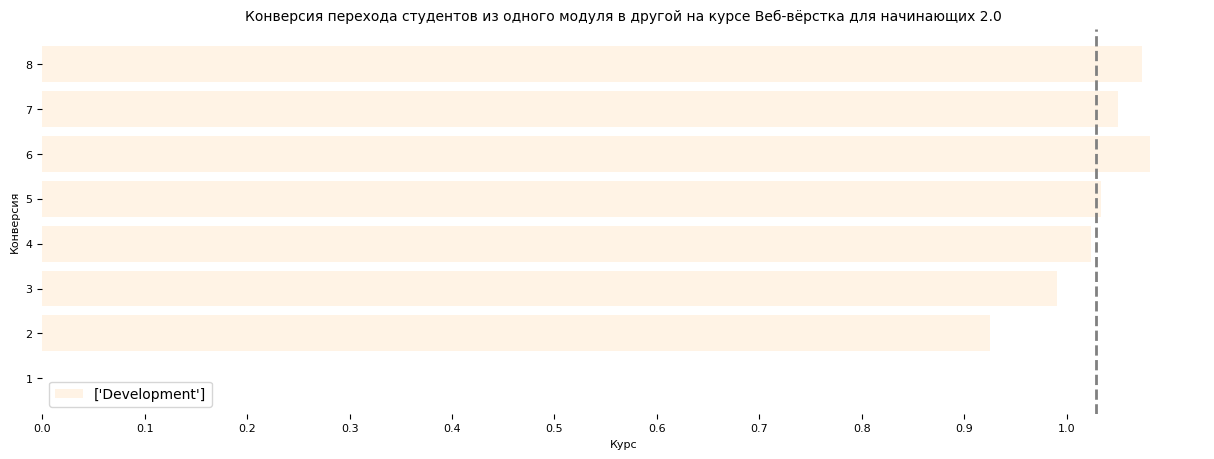

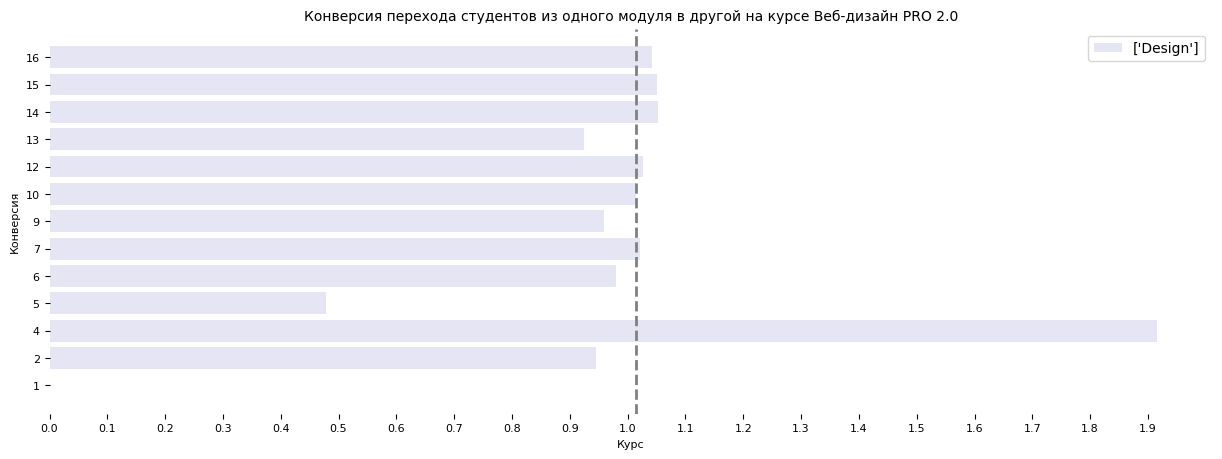

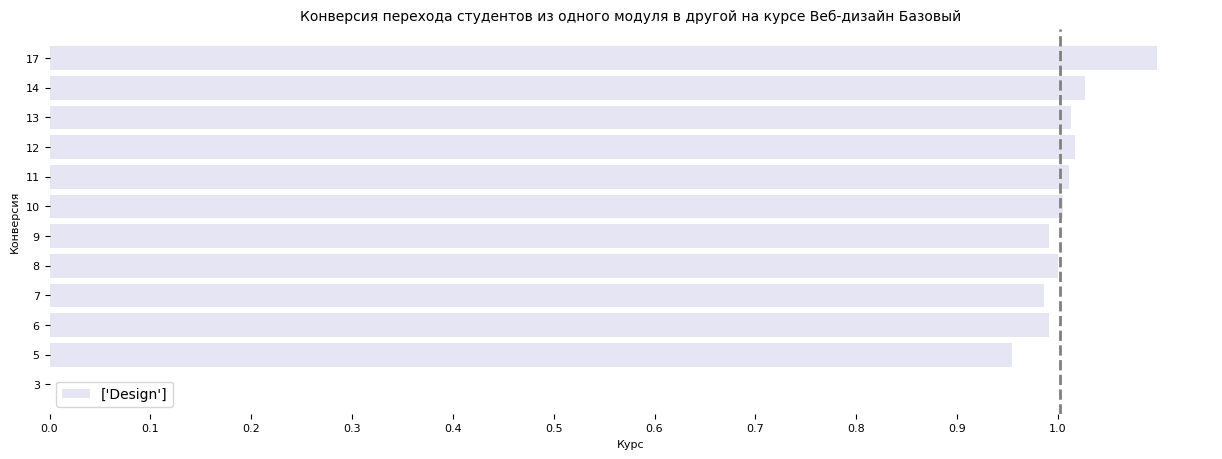

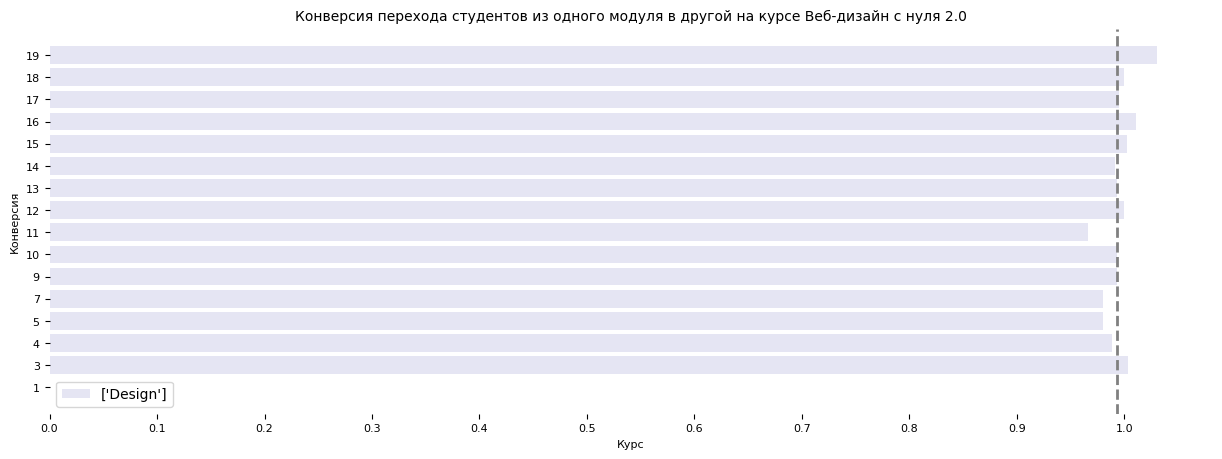

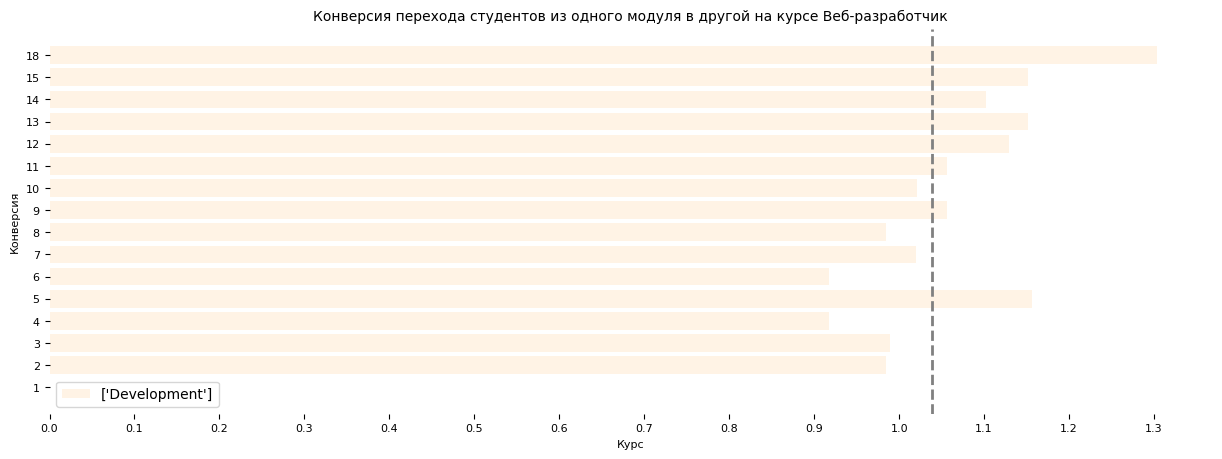

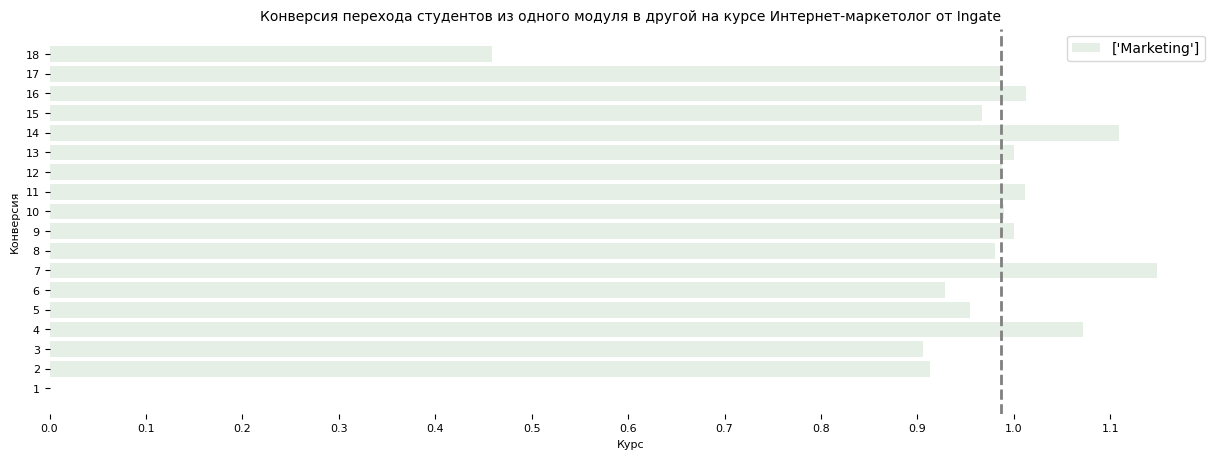

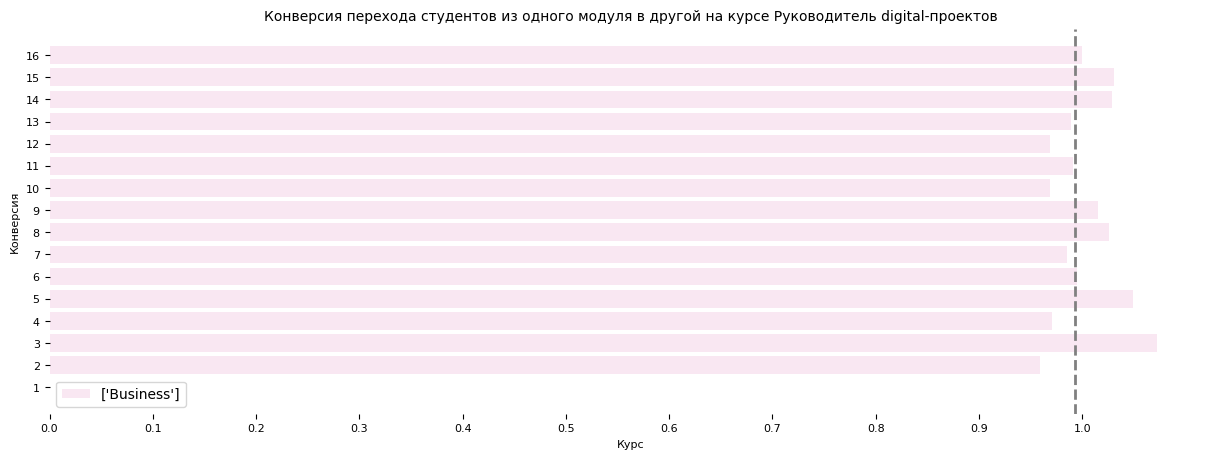

In [36]:
plt.rcdefaults() 

def color(data):
    fields = list(data['course_field'].unique())
    for i in range(len(fields)):
        if fields[i] == 'Business':
            color = 'mediumvioletred'
        elif fields[i] == 'Development':
            color = 'darkorange'
        elif fields[i] == 'Marketing':
            color = 'darkgreen'
        else:
            color = 'darkblue'
            
    return color

for i in range(len(list_courses)):
    
    fig,ax = plt.subplots(figsize = (15,5))
    data = conversion[conversion['course_title'] == list_courses[i]]
    ax.barh(width = data['conversion'], y = data['module_number'].astype('str'), color = color(data),\
            label = data['course_field'].unique(),\
           alpha = 0.1)
    ax.axvline(x=data['conversion'].median(), color='grey', linewidth=2, linestyle='--')
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(8)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(8)
    ax.set_ylabel('Конверсия',size = 8)
    ax.set_xlabel('Курс', size = 8)
    ax.set_xticks(np.arange(0,data['conversion'].max(), 0.1))
    ax.set_title('Конверсия перехода студентов из одного модуля в другой на курсе ' + list_courses[i], size = 10)
    plt.box(on = None)
    plt.legend()
   
plt.show();